
#Measuring Neutrino Mass

Despite the neutrino being the most abundant (matter) particle in the universe we still do not know one of its fundamental characteristics, its mass. Neutrino oscillation experiments have proven definitively that neutrinos must have mass (otherwise they would not be able to change flavour via quantum mechanical mixing), but the absolute value of the mass is almost completely unknown.

## How do we measure the neutrino mass?

Way back in the 1930s Enrico Fermi (who named the neutrino) was the first to suggest a way of measuring the neutrino mass. His solution was to look at the energy of electrons coming from beta decay.

![Fermi's Beta decay sketch showing the effect of light or heavy neutrinos.](https://www.hep.ucl.ac.uk/undergrad/0056/other/projects/cres/fermiBetaSpectrum.png "Fermi's Beta Decay Sketch")


## So we can measure the electron energy, but how do we do that?

One of the most promising techniques for measuring the neutrino mass is called cyclotron radiation emission spectroscopy (CRES). In this process an electron with kinetic energy $T$ is placed in a magentic field and the electron undergoes cyclotron motion about the magnetic field lines.

### Cyclotron radiation
The angular cyclotron frequency, $\omega_c$, of an electron with kinetic energy $T$ and mass $m_{e}$ in a magnetic field $B$ is
$$ \omega_{C} = \frac{eB}{\gamma m_e}=\frac{eB}{m_e + T/c^2} $$
The cyclotron frequency $f_c$ is related to the angular cyclotron frequency in the usual fashion.
$$ f_c = \frac{\omega_c}{2 \pi} $$

Since a charge moving in a circle is continually accelerating, and accelerating charges radiate, we can measure the energy of the electron by measuring the frequency of the emitted radiation.

### Data description
In the code below we will show you two datasets that represent (simulated) electrons in a magnetic field.

1. In one data set you will find the voltage signals that you might see on an oscilloscope attached to the antenna that is observing the cyclotron radiation emission. So this is just a time series of voltage values.
2. In the other data set you will find spectogram pictures which show the frequency as a function of time, in practice these images are calcuable from the voltage time series data.

In addition there is some meta data for each waveform-spectrogram pair describing the sumlated chirp in terms of start time, initial frequency, frequency slope, simulated [noise temperature](https://en.wikipedia.org/wiki/Noise_temperature) and signal collection efficiency (directly proportional to amplitude.

## Machine learning tasks
1. Write a machine learning method to determine the start frequency and time of a chirp from the spectrogram data.
2. Write a machine learning method to determine the start frequency and time of a chirp from the time series data.
3. Write a machine learning method to determine the start frequency and time of a chirp using both the spectrogram and time series data.

How does the frequency resolution (e.g. the difference or standard deviation of measured frequency - true frequency from the meta data) depends on the simulated noise temperature or chrip 'slope'?

### Potential optional extensions
1. Generate your own data (using the functions in the cres.ipynb notebook) to investigate how the frequency resolution (e.g. the standard deviation of measured frequency - true frequency from the meta data) depends on the simulated collection efficiency




#Loading Data

In [ ]:
# Import some libraries needed for the notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Import necessary libraries
import urllib.request
import os
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define your file names
spectName = "cresSpect0.npy"
waveName = "cresWave0.npy"
metaName = "cresSpectMeta0.csv"

# Define the base path where you want to store your files in Google Drive
base_path = '/content/drive/My Drive/ProjectData/'

# Check if the directory exists, if not, create it
if not os.path.exists(base_path):
    os.makedirs(base_path)

# Define the full paths where the files will be saved
full_spect_path = os.path.join(base_path, spectName)
full_wave_path = os.path.join(base_path, waveName)
full_meta_path = os.path.join(base_path, metaName)

# Download the files only if they do not already exist in the target location
if not os.path.isfile(full_wave_path):
    urllib.request.urlretrieve('https://www.hep.ucl.ac.uk/undergrad/0056/other/projects/cres/data/' + waveName, full_wave_path)
if not os.path.isfile(full_spect_path):
    urllib.request.urlretrieve('https://www.hep.ucl.ac.uk/undergrad/0056/other/projects/cres/data/' + spectName, full_spect_path)
if not os.path.isfile(full_meta_path):
    urllib.request.urlretrieve('https://www.hep.ucl.ac.uk/undergrad/0056/other/projects/cres/data/' + metaName, full_meta_path)

# Load and process your files as needed, now using the paths in Google Drive
images = np.load(full_spect_path)
waves = np.load(full_wave_path)
df = pd.read_csv(full_meta_path)

# Displaying the description of the loaded metadata as an example
df.describe()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,t0s,f0s,c0s,Ts,eps
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.0
mean,4.854936e-04,2.508558e+07,3.998445e+08,55.620919,1.0
std,2.811035e-04,2.910485e+06,2.896642e+07,14.665465,0.0
min,1.952245e-07,2.000855e+07,3.500876e+08,30.029654,1.0
25%,2.524659e-04,2.261877e+07,3.751983e+08,42.852301,1.0
50%,4.722594e-04,2.519946e+07,4.008977e+08,56.122753,1.0
75%,7.181318e-04,2.761767e+07,4.241221e+08,68.010340,1.0
max,9.991728e-04,2.998565e+07,4.498595e+08,79.974410,1.0


## Quick look at data
The code below will extract an event and plot the waveform and spectrogram

Looking at Event 1
t0s    6.015051e-04
f0s    2.513870e+07
c0s    4.196592e+08
Ts     3.046792e+01
eps    1.000000e+00
Name: 1, dtype: float64
waves.shape (1000, 200000)
images.shape (1000, 600, 100)


Text(0.5, 1.0, 'Event 1, T=30.5K, t0=6.0e-01ms, f0=25.1MHz,c0=0.4MHz/ms ')

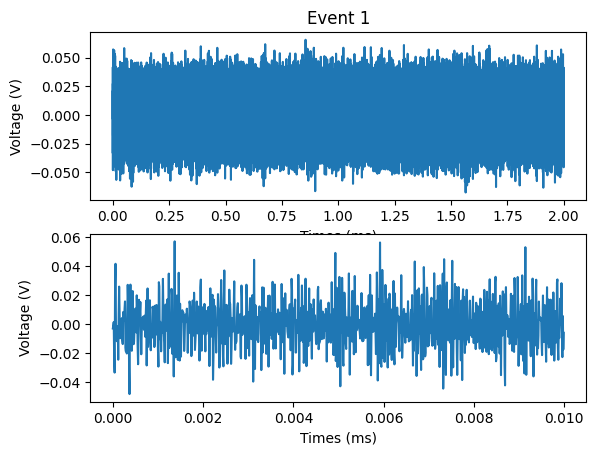

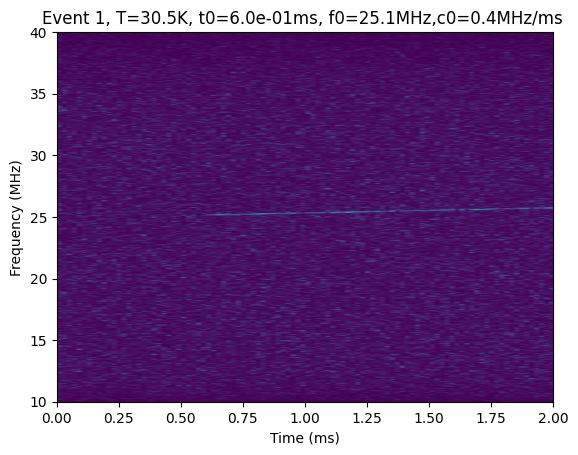

In [ ]:
# The times that go with the voltage values
N=len(waves[0]) #200,000 numbers
dt=1e-8 #100MSa/s
dt = dt * 1e3 # Convert seconds to milliseconds
t=np.linspace(0,dt*(N-1),N) #Time array
whichEvent=1


print("Looking at Event {i}".format(i=whichEvent))
print(df.iloc[whichEvent])
print("waves.shape",waves.shape) #1000 events, 200000 numbers per event
print("images.shape",images.shape) #1000 events, 600x100 images 600 frequency bins, 100 time slices


fig,ax = plt.subplots(2,1)
ax[0].plot(t,waves[whichEvent])  # Plot voltage v time
ax[0].set_xlabel("Times (ms)")
ax[0].set_ylabel("Voltage (V)")
ax[0].set_title("Event {ind}".format(ind=whichEvent))
ax[1].plot(t[0:1000],waves[whichEvent][0:1000])  # Zoomed plot voltage v time
ax[1].set_xlabel("Times (ms)")
ax[1].set_ylabel("Voltage (V)")

fig,ax = plt.subplots()
ax.imshow(images[whichEvent],extent=[0,2,10,40],aspect='auto',origin='lower')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Frequency (MHz)")
titleStr='Event {ind}, T={T:.1f}K, t0={t0:.1e}ms, f0={f0:.1f}MHz,c0={c0:.1f}MHz/ms '.format(
        ind=whichEvent,
        T=df['Ts'][whichEvent],
        t0=df['t0s'][whichEvent]*1e3, #s->ms
        f0=df['f0s'][whichEvent]/1e6, #Hz->MHz
        c0=df['c0s'][whichEvent]/1e9)  #Hz/s  ->Mhz/ms
ax.set_title(titleStr)

#Benchmark start time and resolution by eye

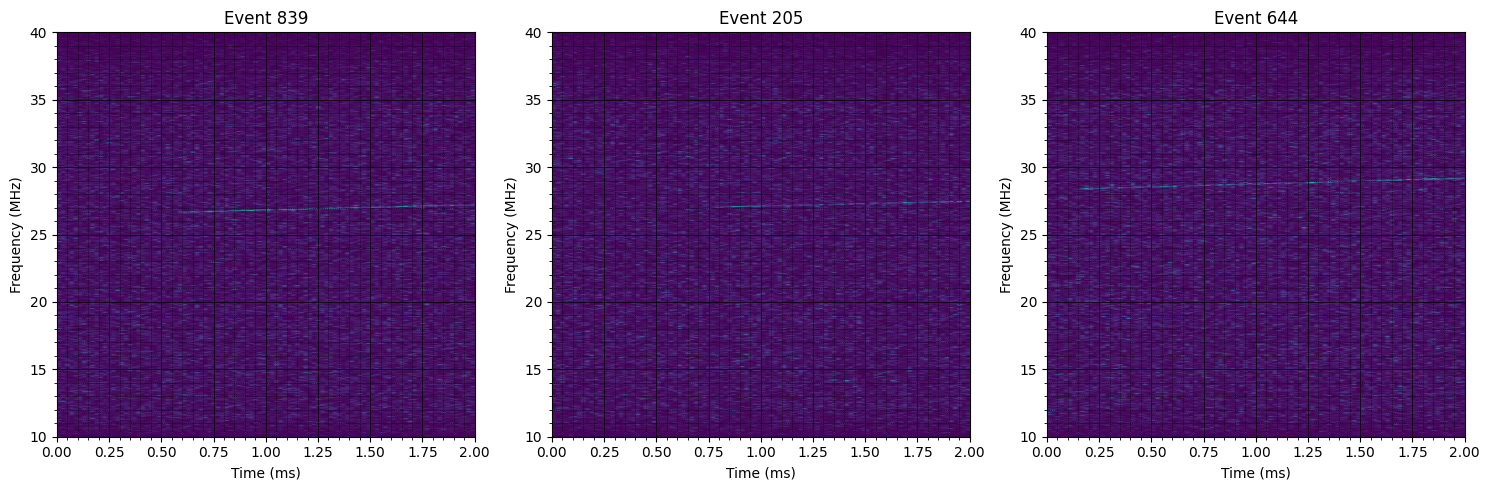

array([838, 204, 643])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Selecting 3 random indices from the 1000 events
random_indices = np.random.choice(images.shape[0], 3, replace=False)

# Plotting spectrogram images for the selected events
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    event_index = random_indices[i]
    ax.imshow(images[event_index],extent=[0,2,10,40], aspect='auto', origin='lower')
    titleStr = f'Event {event_index+1}'

    ax.set_title(titleStr)
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Frequency (MHz)")

    # Adding major and minor gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')  # Major gridlines
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')  # Minor gridlines
    ax.minorticks_on()  # This is necessary to display the minor gridlines

plt.tight_layout()
plt.show()

# Output the selected event indices
random_indices


### Manual Estimation Accuracy

When manually estimating the start frequency (`f0`) and start time (`t0`) from the spectrogram images, we need to establish a baseline accuracy level. This is crucial because it sets a standard against which we can compare our neural network's performance.

### Approach:
- By visually inspecting the spectrogram images, we determine the point where the chirp appears to begin.
- The start frequency (`f0`) is estimated by identifying the frequency at which the chirp starts. We aim for an accuracy level of ±0.5 MHz (±500,000 Hz), , acknowledging the limitations of visual resolution and the granularity of the displayed data.

- The start time (`t0`) is estimated by noting the time at which the chirp first becomes distinguishable from the background noise. We aim for an accuracy level of ±0.05 ms (±0.00005 s). If the resolution impact were directly proportional between the time and frequency domains, akin to the observed ratio in frequency, one might expect an even finer temporal resolution, potentially around ±0.025 ms under ideal conditions. However, the practical limitation imposed by the blurriness in the time dimension necessitates a more conservative estimation threshold, underscoring the challenges in achieving similar levels of precision for time estimations as for frequency estimations.

### Significance:
- Establishing this manual accuracy level helps in assessing the 'human-level performance' on this task.
- The neural network's predictions can then be evaluated in the context of this manual benchmark. If the network achieves or surpasses this level of accuracy, it is considered to have a good performance.
- Understanding the resolution to which humans can estimate these values informs us about the practical limits of the task and sets a realistic expectation for the model's predictions.


manual benchmarks: ±0.5 MHz (±500,000 Hz) & ±0.05 ms (±0.00005 s)


#Task 1: Spectogram Image Analysis

Here I normalise the data, build the model, and evaluate its performance.


In [ ]:
#TASK 1

print(f"Original Images Range: Min: {images.min()}, Max: {images.max()}")


Original Images Range: Min: 9.254233953712211e-20, Max: 5.159785560186846e-10


Spectogram data is already in very low range and far from range of typical image pixel values (0-255 for 8-bit images); using min-max normalisation.

In [ ]:
#Data Preprocessing

# Normalize spectrogram images
def manual_min_max_scaling(images):
    """
    Manually normalize spectrogram images using Min-Max scaling to the [0, 1] range.

    Parameters:
    - images: numpy array of images with shape (num_images, height, width)

    Returns:
    - scaled_images: numpy array of scaled images with the same shape, values between [0, 1]
    """
    # Initialize an array to hold the scaled images with the same shape as the input
    scaled_images = np.zeros(images.shape, dtype=np.float32)

    # Calculate the min and max across all images
    images_min = images.min()
    images_max = images.max()

    # Apply Min-Max scaling to each image
    # Avoid division by zero by adding a small epsilon if max and min are the same
    epsilon = 1e-10
    scaled_images = (images - images_min) / (images_max - images_min + epsilon)

    return scaled_images

# Normalize images to range [0, 1] to improve model convergence speed.
normalized_images = manual_min_max_scaling(images)

# Reshape normalized images to include the channel dimension for CNN compatibility.
normalized_images_reshaped = normalized_images.reshape(-1, 600, 100, 1)

# Check the range after normalization
print(f"Normalized Images Range: Min: {normalized_images.min()}, Max: {normalized_images.max()}")


# Normalize time series data using z-score normalization
def normalize_time_series_data(data):
  """
    Normalize time series data using z-score normalization.

    This function computes the z-score of each data point in the input array, effectively
    standardizing the dataset to have a mean of 0 and a standard deviation of 1. Z-score
    normalization is a common preprocessing step for time series data in machine learning
    tasks to ensure that the scale of the data does not influence the model's performance.

    Parameters
    ----------
    data : numpy.ndarray
        The input time series data as a 1D NumPy array. This array represents the series
        of data points to be normalized.

    Returns
    -------
    numpy.ndarray
        The normalized time series data as a 1D NumPy array, where each data point has
        been transformed to its corresponding z-score."""
    # Compute mean and standard deviation
    mean = np.mean(data)
    std = np.std(data)
    # Z-score normalization
    normalized_data = (data - mean) / std
    return normalized_data

# Normalize each time series data in waves
normalized_waves = np.array([normalize_time_series_data(wave) for wave in waves])

normalized_mean = np.mean(normalized_waves)
normalized_std = np.std(normalized_waves)

print(f"Mean of normalized time series data: {normalized_mean}")
print(f"Standard deviation of normalized time series data: {normalized_std}")




Normalized Images Range: Min: 0.0, Max: 0.8376566861980334
Mean of normalized time series data: -1.4720336061202487e-19
Standard deviation of normalized time series data: 0.9999999999999991


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

labels = df[['t0s', 'f0s']].values

# Normalize labels to bring them to a comparable scale
scaler = MinMaxScaler()
labels_scaled = scaler.fit_transform(labels)


Normalise labels to [0, 1] range using Min-Max scaling: 'fit' calculates scaling parameters from training data, ensuring consistent target value scale across datasets. 'transform' applies scaling. Fit on training data to avoid data leakage.


In [ ]:
# Splitting data into training, testing, and validation sets ensures that our model can be trained on one subset of the data,
# validated on another, and finally tested on unseen data to evaluate its generalization capability.

# First, split the spectrogram images into training (including validation) and testing sets
X_train_val_images, X_test_images, y_train_val_images, y_test_images = train_test_split(
    normalized_images_reshaped, # your spectrogram images
    labels_scaled, # the labels for your images, e.g., start frequency and time of a chirp
    test_size=0.2, # denotes that 20% of the data will be used as the test set
    random_state=42, # seed for reproducibility of your split
    shuffle=True # to shuffle the dataset before splitting (highly recommended)
)

# Now, split the training data further to create a validation set
val_size = 0.25  # Adjusted to account for the initial split, to make the validation set 20% of the original dataset size

X_train_images, X_val_images, y_train_images, y_val_images = train_test_split(
    X_train_val_images, # Use the training data that includes potential validation data
    y_train_val_images, # Correctly using the labels corresponding to the X_train_val_images
    test_size=val_size, # This will now correctly create a validation set that is approximately 20% of the original dataset
    random_state=42
)

# Assuming a similar process needs to be done for the time series data (normalized_waves)
# Make sure to first split into training (including validation) and testing sets
X_train_val_waves, X_test_waves, y_train_val_waves, y_test_waves = train_test_split(
    normalized_waves, # your time series data
    labels_scaled, # the labels for your time series data, similar to above
    test_size=0.2, # same as above
    random_state=42, # keeping the same random state ensures matched splits across datasets
    shuffle=True
)

# Then, split the training data further to create a validation set for time series data
X_train_waves, X_val_waves, y_train_waves, y_val_waves = train_test_split(
    X_train_val_waves, # Use the training data that includes potential validation data
    y_train_val_waves, # Correctly using the labels corresponding to the X_train_val_waves
    test_size=val_size, # This will now correctly create a validation set that is approximately 20% of the original dataset
    random_state=42
)


In [ ]:
print("Training Labels Range:")
print(f"Min: {y_train_images.min()}, Max: {y_train_images.max()}")

print("Testing Labels Range:")
print(f"Min: {y_test_images.min()}, Max: {y_test_images.max()}")

print("\n")

print(f"Training images shape: {X_train_images.shape}")
print(f"Validation images shape: {X_val_images.shape}")
print(f"Test images shape: {X_test_images.shape}")


print(f"Training Images Range: Min: {X_train_images.min()}, Max: {X_train_images.max()}")
print(f"Testing Images Range: Min: {X_test_images.min()}, Max: {X_test_images.max()}")


Training Labels Range:
Min: 0.0, Max: 1.0
Testing Labels Range:
Min: 0.0, Max: 0.9986575363637566


Training images shape: (600, 600, 100, 1)
Validation images shape: (200, 600, 100, 1)
Test images shape: (200, 600, 100, 1)
Training Images Range: Min: 8.61023391659648e-10, Max: 0.8376566861980334
Testing Images Range: Min: 0.0, Max: 0.6417026086093819


In [ ]:
#output in training and testing datasets is between 0 and 1, Min-Max scaling for mormalisation was successful!
#shapes show correct split and sizes for CNN input

# Asserts equal sizes of DataFrame, normalized_images, and normalized_waves to ensure data alignment for model training.
assert len(df) == len(normalized_images) == len(normalized_waves), "Mismatch in dataset sizes."


## Task 1 Model Developement:

### Hyperparameter Tuning and Model Adjustments:

1. **Initial Configuration:** We began with a baseline convolutional neural network (CNN) model, recognizing the potential of CNNs for image analysis tasks due to their ability to efficiently capture spatial hierarchies in data.

2. **Layer and Neuron Experimentation:** We experimented with different configurations, including the number of convolutional layers, the size of filters, and the number of neurons in dense layers. These adjustments were guided by the model's performance in terms of Mean Squared Error (MSE) and Mean Absolute Error (MAE), as well as the goal of reducing overfitting.

    - Adding additional convolutional layers and experimenting with filter sizes (from 2x2 to 3x3 and 4x4) allowed us to explore the balance between capturing detail and achieving a higher level of abstraction.
    - Adjusting the number of neurons in dense layers and including dropout layers were key strategies in managing model complexity and combating overfitting.

3. **Regularization Techniques:** To further address overfitting, we applied regularization techniques such as L2 regularization, which adds a penalty on the magnitude of coefficients, and dropout, which randomly omits a subset of features at each iteration of the training process.

4. **Hyperparameter Optimization:** Utilizing tools like Keras Tuner, we conducted hyperparameter tuning sessions to find the optimal settings for our model. This included determining the best number of filters in convolutional layers and the optimal dropout rate, among other parameters.

5. **Model Evaluation:** Throughout the development process, we closely monitored the model's loss over epochs, using graphs to visualize the learning trajectory and identify points of overfitting or underperformance.

6. **Activation Functions and Pooling:** We also experimented with different activation functions, such as LeakyReLU, to enhance the model's non-linearity without the drawbacks of traditional ReLU activation. The inclusion of max pooling layers further helped reduce the spatial dimensions of feature maps, contributing to the model's efficiency.


The development of our model for Task 1 was an iterative process that involved balancing model complexity with the need to accurately capture the nuances of spectrogram images. By fine-tuning hyperparameters, experimenting with different architectural elements, and employing regularization techniques, we were able to develop a robust model capable of making precise predictions while mitigating the risk of overfitting.


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU


# build CNN
# use a CNN due to its focus on image analysis
model_regression = models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=(600, 100, 1)),
    LeakyReLU(alpha=0.01),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (4, 4)),
    LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    Dropout(0.3),
    #layers.Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(2, activation='linear')  # Output layer for regression
])


# Model summary
model_regression.summary()

# Compile the model with Mean Squared Error loss
model_regression.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 598, 98, 64)       640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 598, 98, 64)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 299, 49, 64)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 46, 128)      131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 296, 46, 128)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 98, 15, 128)       0         
 g2D)                                                 

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping


def build_model(hp):
  """
    Builds and compiles a convolutional neural network model for regression tasks,
    with hyperparameters defined using the Keras Tuner.

    The model consists of two convolutional layers followed by max-pooling layers,
    a flattening layer, a dropout layer for regularization, and a dense output layer
    with a linear activation function. The model uses the Adam optimizer and mean
    squared error loss function.

    Parameters
    ----------
    hp : keras_tuner.HyperParameters
        Hyperparameters class instance from Keras Tuner, used to define the search space
        for hyperparameters like the number of filters in convolutional layers and dropout rate.

    Returns
    -------
    keras.Model
        A compiled Keras model ready for training."""
    model = keras.Sequential([
        layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=64, step=16), kernel_size=(3, 3), input_shape=(600, 100, 1)),
        LeakyReLU(alpha=0.01),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32), kernel_size=(4, 4)),
        LeakyReLU(alpha=0.01),
        layers.MaxPooling2D((3, 3)),

        layers.Flatten(),
        Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),

        layers.Dense(2, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,  # Set to a reasonable number to keep the search time reasonable
    executions_per_trial=1,
    directory='model_tuning',
    project_name='CNNHyperparamOpt'
)

tuner.search_space_summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Perform the hyperparameter search
tuner.search(X_train_images, y_train_images, epochs=2, validation_data=(X_val_images, y_val_images), callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of filters in the first Conv2D layer is {best_hps.get('conv_1_filter')}
and in the second Conv2D layer is {best_hps.get('conv_2_filter')}. The optimal dropout rate is {best_hps.get('dropout')}.
""")


Trial 5 Complete [00h 05m 24s]
val_mae: 0.2380753755569458

Best val_mae So Far: 0.23377725481987
Total elapsed time: 00h 28m 43s

The hyperparameter search is complete. The optimal number of filters in the first Conv2D layer is 64
and in the second Conv2D layer is 128. The optimal dropout rate is 0.30000000000000004.



In [ ]:
#train the model

history = model_regression.fit(
    X_train_images, y_train_images,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_images, y_val_images),
    verbose=1
)


test_loss = model_regression.evaluate(X_test_images, y_test_images, verbose=1)
print(f"Test MSE: {test_loss}")


Epoch 1/10
19/19 [==============================] - 241s 13s/step - loss: 0.1202 - mean_absolute_error: 0.2868 - val_loss: 0.0821 - val_mean_absolute_error: 0.2446
Epoch 2/10
19/19 [==============================] - 256s 14s/step - loss: 0.0876 - mean_absolute_error: 0.2532 - val_loss: 0.0801 - val_mean_absolute_error: 0.2414
Epoch 3/10
19/19 [==============================] - 238s 13s/step - loss: 0.0776 - mean_absolute_error: 0.2389 - val_loss: 0.0687 - val_mean_absolute_error: 0.2206
Epoch 4/10
19/19 [==============================] - 236s 12s/step - loss: 0.0604 - mean_absolute_error: 0.2070 - val_loss: 0.0472 - val_mean_absolute_error: 0.1708
Epoch 5/10
19/19 [==============================] - 236s 12s/step - loss: 0.0398 - mean_absolute_error: 0.1520 - val_loss: 0.0378 - val_mean_absolute_error: 0.1394
Epoch 6/10
19/19 [==============================] - 235s 12s/step - loss: 0.0314 - mean_absolute_error: 0.1325 - val_loss: 0.0338 - val_mean_absolute_error: 0.1352
Epoch 7/10
19/19

## Model Evaluation Metrics

1. **MSE and MAE from the Model:**
   - **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)** serve as our primary metrics for assessing the model's accuracy. MSE gives us the average of the squares of the errors, heavily penalizing larger errors, while MAE provides a more straightforward average error magnitude. Together, they offer a comprehensive view of the model's predictive performance.

2. **Scaled Actual and Prediction Values:**
   - We compare the model's predictions with actual values on a scaled basis. This step ensures that our evaluation considers the normalized data range, facilitating an analysis that's consistent with the preprocessing steps.

3. **Model Loss Over Epochs Graph:**
   - Tracking the model's loss over epochs allows us to visualize the learning process. A decreasing trend in loss indicates that the model is effectively learning from the training data, while any anomalies or plateaus can signal areas for potential improvement.

4. **Inverse Scaling Predictions and Actual Values to ms and MHz:**
   - To interpret the model's predictions in a meaningful context, we inverse scale the output to milliseconds (ms) for time predictions and Megahertz (MHz) for frequency predictions. This step translates the model's output back into physical units, making the results more tangible and easier to compare with real-world values.

5. **MSE, RMSE, and MAE for All Scaled and Inverse Scaled Values:**
   - For both the scaled and inverse scaled predictions, we calculate **MSE, Root Mean Squared Error (RMSE),** and **MAE.** RMSE, being the square root of MSE, offers another perspective on the error magnitude, especially useful for understanding the error distribution's standard deviation.

6. **Histogram of Prediction Errors for Scaled Values:**
  - We now focus on histograms of prediction errors (prediction - actual values) for scaled values, which aids in visualizing the error distribution within a normalized range. An ideal error distribution is centered around zero, indicating balanced overestimation and underestimation by the model.

7. **Box Plot for Scaled Prediction Errors:**
  - Complementing the histogram, box plots of scaled prediction errors succinctly summarize the error distribution. These plots highlight the median error, the interquartile range, and any outliers, offering insight into the error's central tendency and variability.

8. **Scatter Plots of Predicted vs Actual Values:**
  - Scatter plots directly compare predicted to actual values, visually demonstrating the model's accuracy. These plots are instrumental in identifying biases, variance, and patterns within the model's predictions across the range of observed values. The proximity of data points to the line of unity (where predicted equals actual) indicates prediction accuracy, with deviations highlighting areas for potential model improvement.

9. **Analysis of Prediction Error vs Actual Start Time and Frequency:**
  - To address whether the prediction accuracy for start time and frequency is affected by their values within the observation window, scatter plots of actual start times and frequencies versus prediction errors are examined. This analysis seeks to uncover any systematic biases or trends in prediction errors related to the positioning within the time window or the frequency spectrum, providing insights into model behavior and guiding further refinement.








  


In [ ]:
 #Evaluate the model

# Access additional metrics
print(history.history.keys())

test_loss, test_mae = model_regression.evaluate(X_test_images, y_test_images, verbose=1)
print(f"Test MSE: {test_loss}, Test MAE: {test_mae}")




dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
7/7 [==============================] - 17s 2s/step - loss: 0.0167 - mean_absolute_error: 0.0981
Test MSE: 0.016746247187256813, Test MAE: 0.09814062714576721


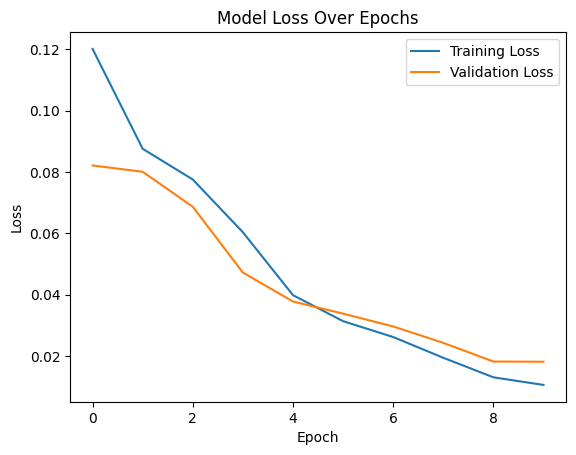

In [ ]:
#plot learning rate
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# Generate predictions for the test set
predictions = model_regression.predict(X_test_images)

# Compare predictions with actual labels for the first few examples
for i in range(5):
    print(f"Actual t0, f0: {y_test_images[i]}, Predicted t0, f0: {predictions[i]}")


7/7 [==============================] - 17s 2s/step
Actual t0, f0: [0.65933726 0.49287185], Predicted t0, f0: [0.69599116 0.63248485]
Actual t0, f0: [0.8781382 0.3220367], Predicted t0, f0: [0.6732614  0.43996215]
Actual t0, f0: [0.69115131 0.20440672], Predicted t0, f0: [0.5509553  0.34732932]
Actual t0, f0: [0.48649204 0.52921668], Predicted t0, f0: [0.6065223 0.5754706]
Actual t0, f0: [0.55951905 0.0779508 ], Predicted t0, f0: [0.5979314  0.21423912]


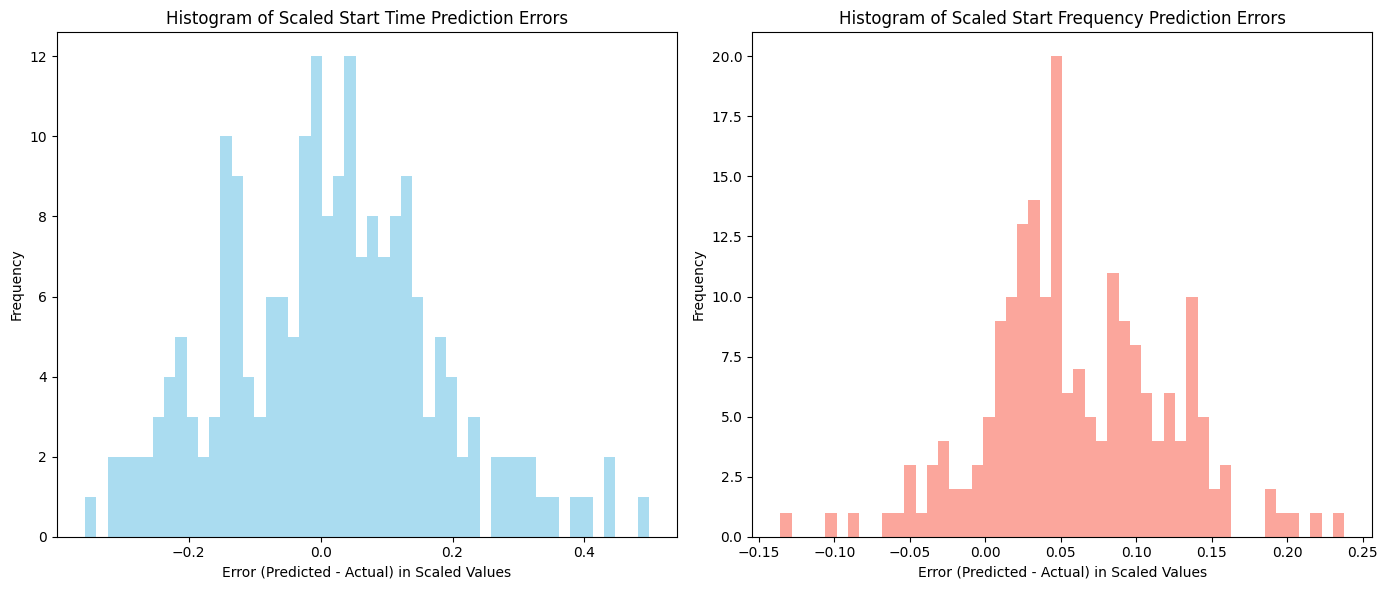

Mean Start Time Error: 0.0132, Standard Deviation: 0.1619
Mean Start Frequency Error: 0.0593, Standard Deviation: 0.0600


In [ ]:
#Evaluating the model

# Calculate the differences between predicted and actual values in the scaled form
scaled_start_time_diff = predictions[:, 0] - y_test_images[:, 0]
scaled_start_freq_diff = predictions[:, 1] - y_test_images[:, 1]

# Plotting the histograms for scaled differences
plt.figure(figsize=(14, 6))

# Histogram for Start Time Prediction Errors in Scaled Values
plt.subplot(1, 2, 1)
plt.hist(scaled_start_time_diff, bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of Scaled Start Time Prediction Errors')
plt.xlabel('Error (Predicted - Actual) in Scaled Values')
plt.ylabel('Frequency')

# Histogram for Start Frequency Prediction Errors in Scaled Values
plt.subplot(1, 2, 2)
plt.hist(scaled_start_freq_diff, bins=50, color='salmon', alpha=0.7)
plt.title('Histogram of Scaled Start Frequency Prediction Errors')
plt.xlabel('Error (Predicted - Actual) in Scaled Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculating mean and standard deviation for both start time and frequency prediction errors
mean_start_time_error = np.mean(scaled_start_time_diff)
std_start_time_error = np.std(scaled_start_time_diff)

mean_start_freq_error = np.mean(scaled_start_freq_diff)
std_start_freq_error = np.std(scaled_start_freq_diff)

# Printing out the results
print(f"Mean Start Time Error: {mean_start_time_error:.4f}, Standard Deviation: {std_start_time_error:.4f}")
print(f"Mean Start Frequency Error: {mean_start_freq_error:.4f}, Standard Deviation: {std_start_freq_error:.4f}")



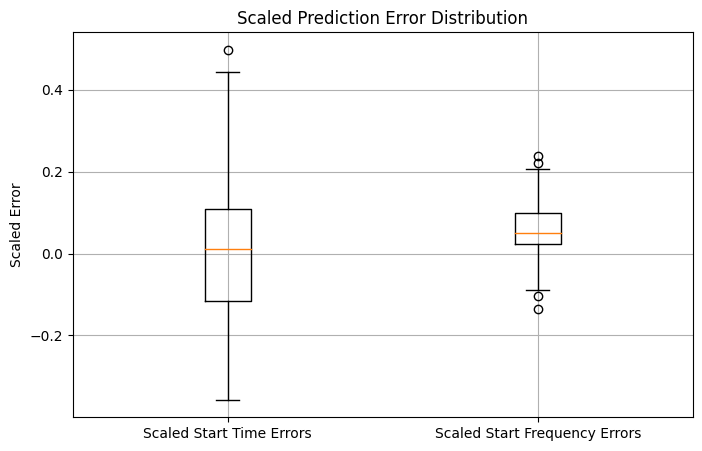

In [ ]:
#boxplot to complement this:

scaled_errors = [scaled_start_time_diff, scaled_start_freq_diff]
scaled_labels = ['Scaled Start Time Errors', 'Scaled Start Frequency Errors']

plt.figure(figsize=(8, 5))
plt.boxplot(scaled_errors, labels=scaled_labels)
plt.title('Scaled Prediction Error Distribution')
plt.ylabel('Scaled Error')
plt.grid(True)
plt.show()

In [ ]:
#ensuring predictions and y test images are compatible shapes to compare them
print(f"Shape of predictions: {predictions.shape}")
print(f"Shape of y_test_images: {y_test_images.shape}")


Shape of predictions: (200, 2)
Shape of y_test_images: (200, 2)


In [ ]:
#check inverse scaling is working :

labels = df[['t0s', 'f0s']].values

#scale and inverse
scaler = MinMaxScaler()
labels_scaled = scaler.fit_transform(labels)  # Normalize the labels
labels_inverse_scaled = scaler.inverse_transform(labels_scaled)

# Now, let's compare some of the original labels and the inverse-transformed ones
print("Original Labels:\n", labels)
print("\nInverse-Transformed Labels:\n", labels_inverse_scaled)

# Optionally, you can use np.allclose to check if all elements are almost equal within a tolerance
are_labels_equal = np.allclose(labels, labels_inverse_scaled)
print("\nAre the original and inverse-transformed labels equal? ", are_labels_equal)


Original Labels:
 [[3.11998435e-04 2.98680902e+07]
 [6.01505081e-04 2.51386975e+07]
 [9.67183354e-04 2.07359836e+07]
 ...
 [9.57540637e-04 2.86094138e+07]
 [4.30574131e-04 2.90639753e+07]
 [1.43201163e-04 2.56876475e+07]]

Inverse-Transformed Labels:
 [[3.11998435e-04 2.98680902e+07]
 [6.01505081e-04 2.51386975e+07]
 [9.67183354e-04 2.07359836e+07]
 ...
 [9.57540637e-04 2.86094138e+07]
 [4.30574131e-04 2.90639753e+07]
 [1.43201163e-04 2.56876475e+07]]

Are the original and inverse-transformed labels equal?  True


In [ ]:
#mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#apply inverse scaling to predictions:

predictions_inverse_scaled = scaler.inverse_transform(predictions)
start_time_pred, start_freq_pred = predictions_inverse_scaled[:, 0], predictions_inverse_scaled[:, 1]

#apply inverse scaling to test values (actual values)
y_test_images_inverse_scaled = scaler.inverse_transform(y_test_images)
start_time_true, start_freq_true = y_test_images_inverse_scaled[:, 0], y_test_images_inverse_scaled[:, 1]


mse_start_time = mean_squared_error(start_time_true, start_time_pred)
print(f"Mean Squared Error for Start Times: {mse_start_time} s^2")

mse_start_freq = mean_squared_error(start_freq_true, start_freq_pred)
print(f"Mean Squared Error for Start Frequencies: {mse_start_freq} Hz^2")
print("\n")

#root mean squared error

rmse_start_time = np.sqrt(mse_start_time)
print(f"Root Mean Squared Error for Start Times: {rmse_start_time} s")

rmse_start_freq = np.sqrt(mse_start_freq)
print(f"Root Mean Squared Error for Start Frequencies: {rmse_start_freq} Hz")
print("\n")


#mean absolute error

mae_start_time = mean_absolute_error(start_time_true, start_time_pred)
print(f"Mean Absolute Error for Start Times: {mae_start_time} s")

mae_start_freq = mean_absolute_error(start_freq_true, start_freq_pred)
print(f"Mean Absolute Error for Start Frequencies: {mae_start_freq} Hz")
print("\n")


Mean Squared Error for Start Times: 2.632783015799005e-08 s^2
Mean Squared Error for Start Frequencies: 707821125082.3622 Hz^2


Root Mean Squared Error for Start Times: 0.0001622585287681053 s
Root Mean Squared Error for Start Frequencies: 841321.0594549278 Hz


Mean Absolute Error for Start Times: 0.00012746606061519886 s
Mean Absolute Error for Start Frequencies: 685274.4329872316 Hz




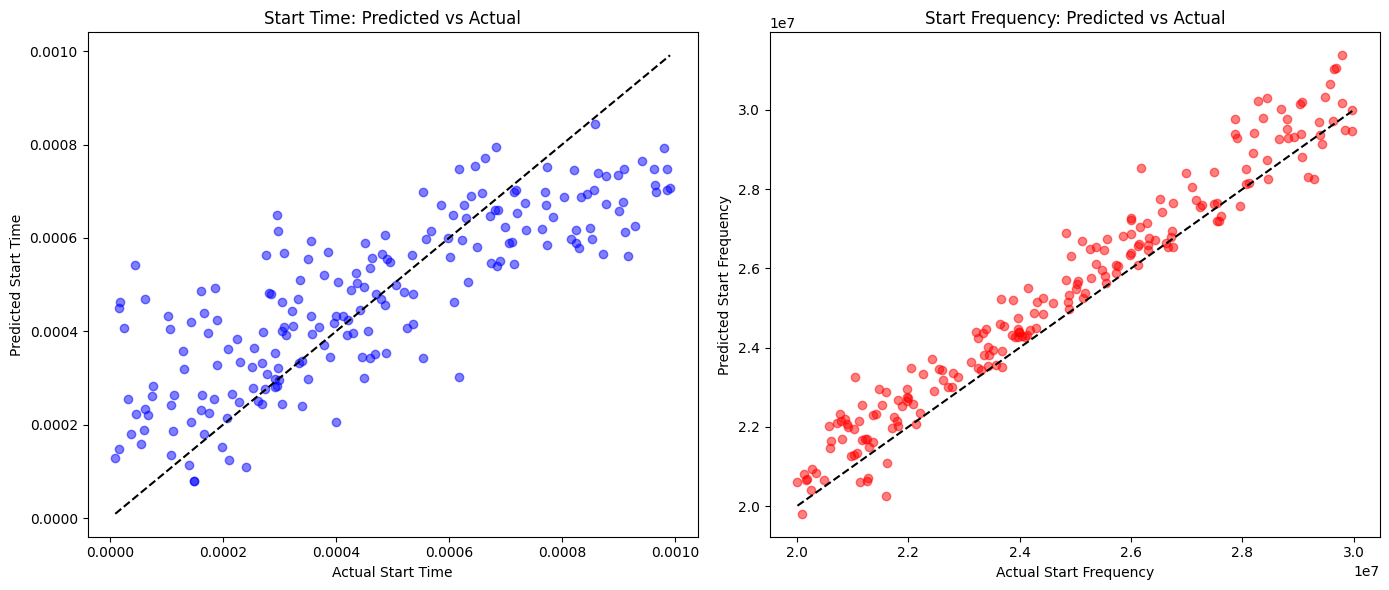

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Start Time Predictions vs Actual Start Time
#This will visually demonstrate how closely the predictions match the actual values.

plt.figure(figsize=(14, 6))

# Start Time
plt.subplot(1, 2, 1)
plt.scatter(start_time_true, start_time_pred, alpha=0.5, color='blue')
plt.title('Start Time: Predicted vs Actual')
plt.xlabel('Actual Start Time')
plt.ylabel('Predicted Start Time')
plt.plot([min(start_time_true), max(start_time_true)], [min(start_time_true), max(start_time_true)], 'k--')  # Diagonal line

# Start Frequency
plt.subplot(1, 2, 2)
plt.scatter(start_freq_true, start_freq_pred, alpha=0.5, color='red')
plt.title('Start Frequency: Predicted vs Actual')
plt.xlabel('Actual Start Frequency')
plt.ylabel('Predicted Start Frequency')
plt.plot([min(start_freq_true), max(start_freq_true)], [min(start_freq_true), max(start_freq_true)], 'k--')  # Diagonal line

plt.tight_layout()
plt.show()


In these plots:

The diagonal line ('k--') represents the line of perfect prediction, where the predicted values exactly match the actual values.
Points that lie close to this diagonal line indicate accurate predictions.
The scatter of points away from the line indicates prediction errors.
By examining these plots, you can assess the accuracy of your model's predictions. Ideally, you want your points to cluster closely around the diagonal line. If they do, it suggests that your model is performing well in predicting the start times and frequencies.

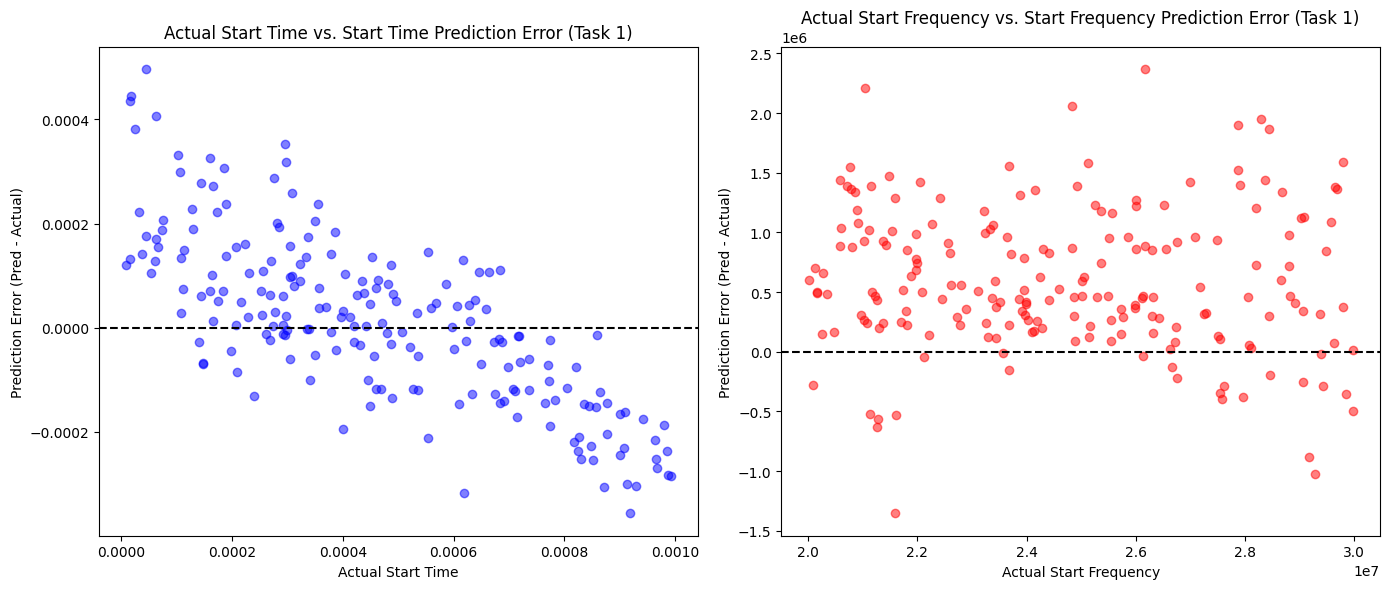

In [ ]:
import matplotlib.pyplot as plt

# Calculate the prediction errors
start_time_error = start_time_pred - start_time_true
start_freq_error = start_freq_pred - start_freq_true

# Scatter plot for Actual Start Time vs. Start Time Prediction Error
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(start_time_true, start_time_error, alpha=0.5, color='blue')
plt.title('Actual Start Time vs. Start Time Prediction Error (Task 1)')
plt.xlabel('Actual Start Time')
plt.ylabel('Prediction Error (Pred - Actual)')
plt.axhline(y=0, color='k', linestyle='--')  # Adds a horizontal line at error=0

# Scatter plot for Actual Start Frequency vs. Start Frequency Prediction Error
plt.subplot(1, 2, 2)
plt.scatter(start_freq_true, start_freq_error, alpha=0.5, color='red')
plt.title('Actual Start Frequency vs. Start Frequency Prediction Error (Task 1)')
plt.xlabel('Actual Start Frequency')
plt.ylabel('Prediction Error (Pred - Actual)')
plt.axhline(y=0, color='k', linestyle='--')  # Adds a horizontal line at error=0

plt.tight_layout()
plt.show()

In these plots:

The horizontal line at error=0 helps identify overestimations (errors above the line) and underestimations (errors below the line) by the model.
The x-axis represents the actual values for start times and start frequencies.
The y-axis represents the prediction errors, calculated as the difference between the predicted and actual values.

In Task 1, we evaluated a Convolutional Neural Network (CNN) model's ability to predict start times and frequencies for neutrino events, crucial for neutrino mass measurements via Coherent Radio Emission from Supernovae (CRES). We prioritized Mean Squared Error (MSE) and its derivatives as evaluation metrics, emphasizing their relevance to our continuous variable prediction challenge.

Our analysis showed that the model's accuracy in estimating start frequencies aligns with the desired benchmark accuracy of ±0.5 MHz, although it exhibited greater error variability in predicting start times. This suggests a potential focus area for improving the model's precision, particularly in early event predictions.

Through histograms and box plots, we observed the error distributions' tendencies, identifying a more symmetric distribution for frequencies and wider variability for times. Scatter and residual plots provided deeper insights into the model's performance across different actual values, indicating systematic errors and highlighting the model's variance in prediction accuracy.

Summarizing, the CNN model shows promising results in frequency estimation but requires refinement in time prediction accuracy. Addressing the noted variability, particularly for early event predictions, through feature engineering or data augmentation, could enhance the model's overall performance and reliability.

# Task 2: Generate synthetic data to help with model

the Conv1D model was initially failing to predict the start time and start frequency of chirps accurately, generating and including synthetic data helps in several ways:

Tuning Model Architecture: With a richer dataset, you have more flexibility to experiment with and fine-tune your model's architecture. You can adjust layers, filters, and other hyperparameters to better capture the nuances of the data.

Evaluating Robustness: Synthetic data can be used to systematically test the model's robustness against various noise levels, chirp slopes, and other signal characteristics. This evaluation can guide further improvements in the model's design and training process.

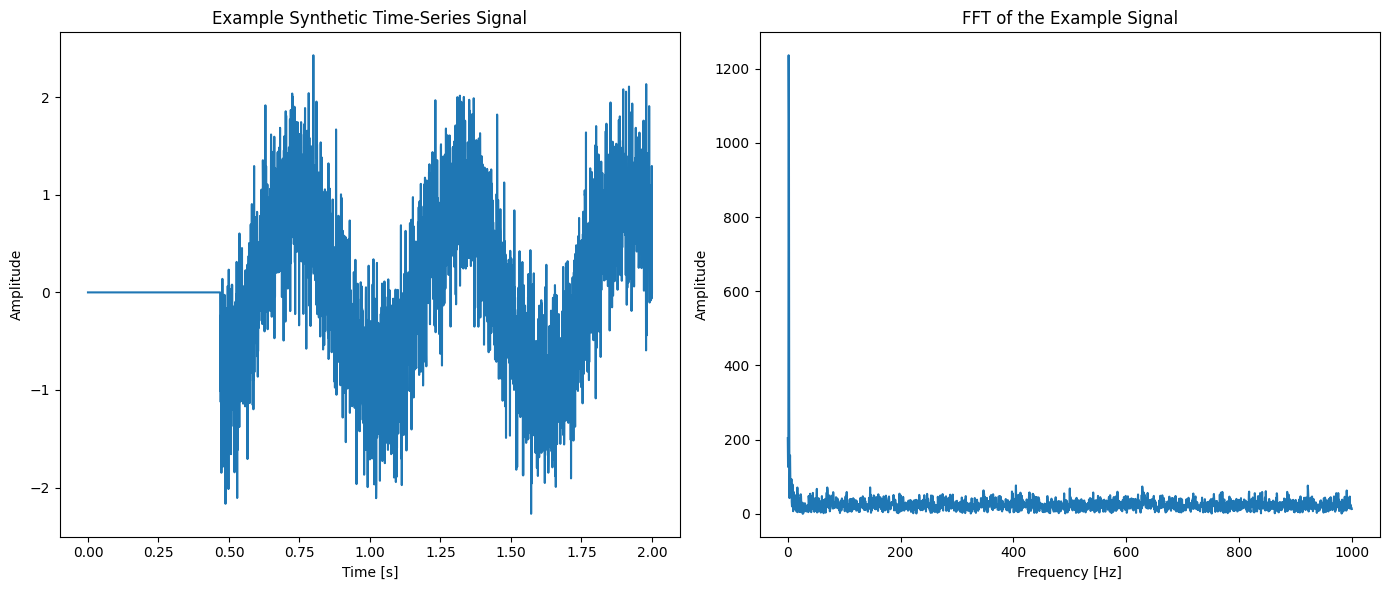

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

# Parameters for the synthetic signal generation
num_samples = 1000  # Number of synthetic signals to generate
sampling_rate = 2000  # Hz
duration = 2  # seconds

# Initialize arrays to hold the generated data
signals = np.zeros((num_samples, int(sampling_rate * duration)))
true_frequencies = np.zeros(num_samples)  # True frequencies for each signal
true_start_times = np.zeros(num_samples)  # True start times for each signal

for i in range(num_samples):
    frequency = np.random.uniform(1, 50)  # Randomly chosen frequency
    start_time = np.random.uniform(0, 0.5)  # Randomly chosen start time
    true_frequencies[i] = frequency
    true_start_times[i] = start_time

    # Calculate the sample index to start the signal
    start_sample = int(start_time * sampling_rate)
    t = np.linspace(start_time, duration, int(sampling_rate * (duration - start_time)), endpoint=False)

    # Generate a synthetic signal starting from the start_time with the specified frequency
    signal = np.sin(2 * np.pi * frequency * t)

    # Add noise to the signal
    noise = np.random.normal(0, 0.5, signal.shape)
    noisy_signal = signal + noise

    # Place the generated noisy signal into the signals matrix, starting at the start_sample
    signals[i, start_sample:start_sample + len(noisy_signal)] = noisy_signal

# To demonstrate, plot one of the generated signals and its FFT
example_signal = signals[0, :]
fft_values = rfft(example_signal)
fft_frequencies = np.fft.rfftfreq(len(example_signal), d=1./sampling_rate)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, duration, int(sampling_rate * duration)), example_signal)
plt.title('Example Synthetic Time-Series Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(fft_frequencies, np.abs(fft_values))
plt.title('FFT of the Example Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [ ]:
# Print the first few values of true frequencies and start times to ensure they're not all zeros
print("Sample true frequencies:", true_frequencies[:5])
print("Sample true start times:", true_start_times[:5])


Sample true frequencies: [ 1.70398534  6.93908961 31.23689419 15.76563602 45.8701858 ]
Sample true start times: [0.46941352 0.08063094 0.4926434  0.41076667 0.00319699]


This is to establish a baseline performance, ensuring that the Conv1D model architecture can learn and predict from the basic structure of your data. Now generate multiple synthetic signals to split into test and training data sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your generated signals and labels are stored in `signals` and `true_labels`

# Split the data into synthetic training set and a temporary set (for synthetic validation and test)
syn_signals_train, syn_signals_temp, syn_labels_train, syn_labels_temp = train_test_split(
    signals, true_labels, test_size=0.4, random_state=42)

# Now, split the temporary set into synthetic validation and test sets
syn_signals_val, syn_signals_test, syn_labels_val, syn_labels_test = train_test_split(
    syn_signals_temp, syn_labels_temp, test_size=0.5, random_state=42)

# syn_signals_train, syn_labels_train are your training data and labels for the synthetic task
# syn_signals_val, syn_labels_val are your validation data and labels for the synthetic task
# syn_signals_test, syn_labels_test are your testing data and labels for the synthetic task

print(f"Synthetic training set size: {syn_signals_train.shape[0]} samples")
print(f"Synthetic validation set size: {syn_signals_val.shape[0]} samples")
print(f"Synthetic test set size: {syn_signals_test.shape[0]} samples")

print("\n")

print(f"Training signals shape before reshaping: {syn_signals_train.shape}")
print(f"Validation signals shape before reshaping: {syn_signals_val.shape}")
print(f"Synthetic test set shape before reshaping: {syn_signals_test.shape}")
print(f"Training labels shape: {syn_labels_train.shape}")
print(f"Validation labels shape: {syn_labels_val.shape}")



Synthetic training set size: 600 samples
Synthetic validation set size: 200 samples
Synthetic test set size: 200 samples


Training signals shape before reshaping: (600, 4000)
Validation signals shape before reshaping: (200, 4000)
Synthetic test set shape before reshaping: (200, 4000)
Training labels shape: (600, 2)
Validation labels shape: (200, 2)


In [ ]:
# Assuming syn_signals_train is your training data
min_value = syn_signals_train.min()
max_value = syn_signals_train.max()

print(f"Minimum value in the training data: {min_value}")
print(f"Maximum value in the training data: {max_value}")


Minimum value in the training data: -3.4331917255568993
Maximum value in the training data: 3.40533830237465


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from tensorflow.keras.regularizers import l2

#build model
model_conv1d = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(4000, 1)),  # '1' indicates a single feature per timestep
    MaxPooling1D(pool_size=3),

    Conv1D(filters=16, kernel_size=4, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.2),
    Dense(70, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(2, activation='linear')
])

model_conv1d.compile(optimizer='adam', loss='mse', metrics=['mae'])

#model summary
model_conv1d.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3998, 128)         512       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 1332, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 1329, 16)          8208      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 664, 16)           0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 10624)             0         
                                                                 
 dropout_2 (Dropout)         (None, 10624)            

In [ ]:
#train the data

history = model_conv1d.fit(
    syn_signals_train,
    syn_labels_train,
    epochs=20,
    batch_size=32,
    validation_data=(syn_signals_val, syn_labels_val),
    verbose=1
)

Epoch 1/20
19/19 [==============================] - 9s 400ms/step - loss: 144.7440 - mae: 8.5181 - val_loss: 110.4409 - val_mae: 7.4944
Epoch 2/20
19/19 [==============================] - 9s 451ms/step - loss: 99.0470 - mae: 6.6125 - val_loss: 105.6121 - val_mae: 6.6052
Epoch 3/20
19/19 [==============================] - 8s 448ms/step - loss: 92.0254 - mae: 6.0660 - val_loss: 104.7983 - val_mae: 6.4427
Epoch 4/20
19/19 [==============================] - 8s 413ms/step - loss: 88.8691 - mae: 6.0357 - val_loss: 107.0460 - val_mae: 6.6690
Epoch 5/20
19/19 [==============================] - 8s 447ms/step - loss: 83.9464 - mae: 5.9540 - val_loss: 104.1440 - val_mae: 6.6509
Epoch 6/20
19/19 [==============================] - 9s 497ms/step - loss: 76.7517 - mae: 5.7022 - val_loss: 111.8877 - val_mae: 6.7521
Epoch 7/20
19/19 [==============================] - 8s 413ms/step - loss: 71.8345 - mae: 5.5209 - val_loss: 111.0976 - val_mae: 6.6594
Epoch 8/20
19/19 [==============================] - 9s

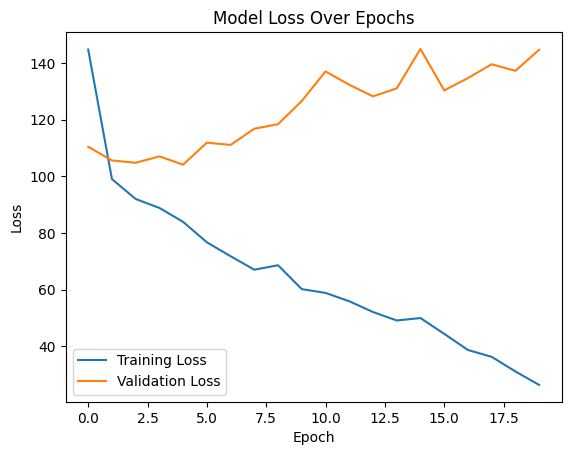

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

7/7 [==============================] - 1s 73ms/step


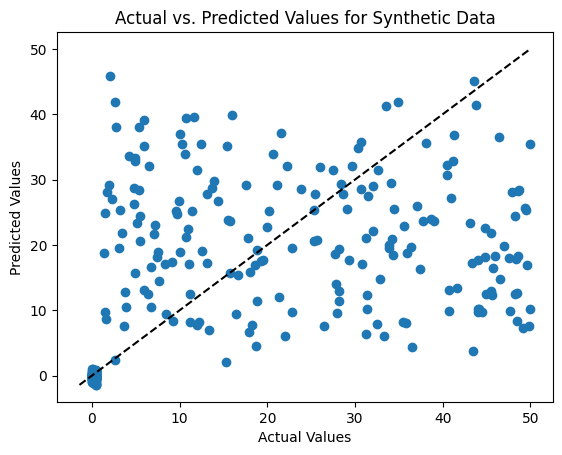

In [ ]:
#scatter plot of actual vs predicted

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'syn_signals_test' is your test dataset
predictions = model_conv1d.predict(syn_signals_test)

# Plotting actual vs. predicted values
plt.scatter(syn_labels_test, predictions) # Scatter plot of actual vs. predicted
plt.title('Actual vs. Predicted Values for Synthetic Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting a line for perfect predictions
max_val = max(np.max(predictions), np.max(syn_labels_test))
min_val = min(np.min(predictions), np.min(syn_labels_test))
plt.plot([min_val, max_val], [min_val, max_val], 'k--') # Black dashed line for reference

plt.show()


For the synthetic data analysis, we observed pronounced overfitting in the Conv1D model, highlighting a crucial misalignment between the model's complexity and the dataset's simplistic patterns. Despite the model's architecture being designed for intricate pattern recognition, it tended towards memorizing training specifics rather than generalizing from broader signal characteristics.

The training and validation loss graph indicated potential overfitting, with training loss decreasing while validation loss fluctuated, suggesting that the model's complexity might be excessive for the relatively simple synthetic dataset. This was further evidenced by scatter plots showing a lack of correlation between actual and predicted values, reinforcing the model's generalization issues.

In Task 2, despite continuous improvement in loss metrics, the model consistently failed to accurately predict start times and frequencies, indicating a lack of sensitivity to the synthetic data's features. This suggests that the initial model configuration, possibly too complex or specialized, struggled with the data's simplicity, necessitating model adjustments. Approaches like introducing more aggressive dropout, regularization, or simplifying the model could potentially enhance its ability to generalize and perform better on synthetic datasets.

#Task 2: Time Series Data Analysis
Here I normalise the data, build the model, and evaluate its performance.

In [ ]:

# Assuming `normalized_waves` is your normalized time series data with shape (1000, 200000)
def average_pooling(data, pool_size):
    # Calculate the number of pools
    num_pools = data.shape[1] // pool_size

    # Initialize the pooled data array
    pooled_data = np.zeros((data.shape[0], num_pools))

    # Perform average pooling
    for i in range(num_pools):
        start_index = i * pool_size
        end_index = start_index + pool_size
        pooled_data[:, i] = np.mean(data[:, start_index:end_index], axis=1)

    return pooled_data

# Apply average pooling to the normalized waves data
pooled_subset_data = average_pooling(normalized_waves, pool_size=200)
pooled_subset_data.shape



(1000, 1000)

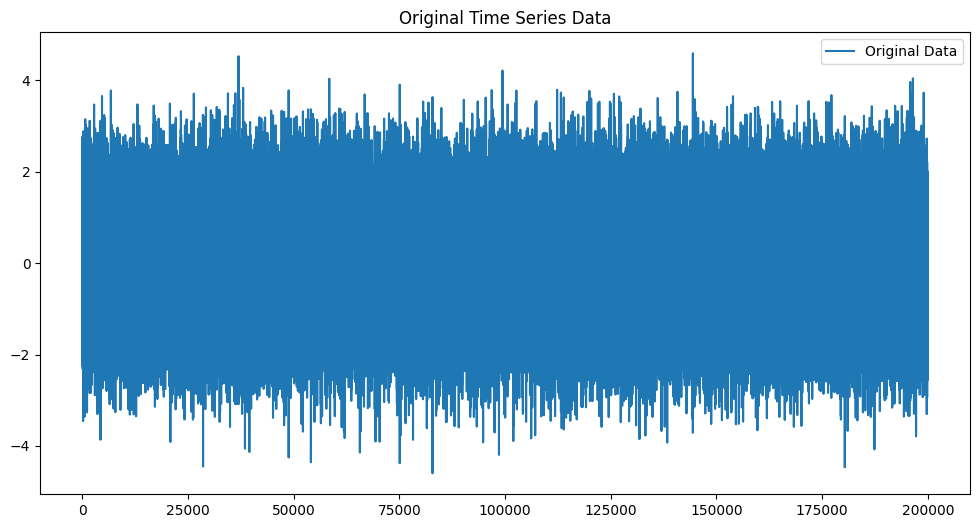

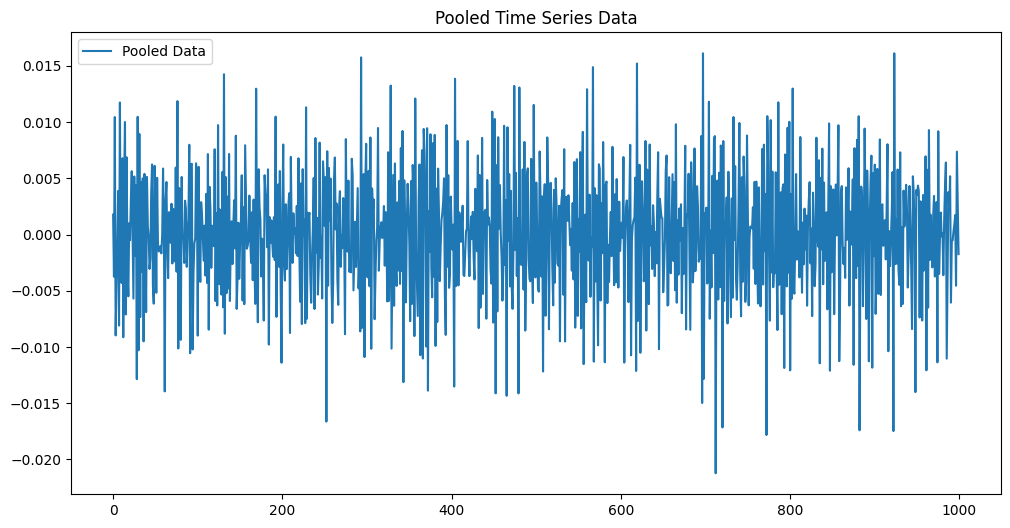

In [ ]:
# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(normalized_waves[0], label='Original Data')
plt.title('Original Time Series Data')
plt.legend()

# Apply average pooling
pooled_data = average_pooling(normalized_waves, pool_size=200)

# Plot pooled data
plt.figure(figsize=(12, 6))
plt.plot(pooled_data[0], label='Pooled Data')
plt.title('Pooled Time Series Data')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training (including validation) and testing sets
X_train_val_subset, X_test_subset, y_train_val_subset, y_test_subset = train_test_split(
    pooled_subset_data,  # Use your subset_data here
    labels_scaled,  # The labels corresponding to the subset_data
    test_size=0.2,  # Reserving 20% of the data for testing
    random_state=42,
    shuffle=True
)

# Split the training data further to create a validation set
val_size = 0.25  # To allocate 20% of the original data for validation (since 0.25 * 0.8 = 0.2)
X_train_subset, X_val_subset, y_train_subset, y_val_subset = train_test_split(
    X_train_val_subset,  # Use the training data that includes potential validation data
    y_train_val_subset,  # The labels corresponding to the X_train_val_subset
    test_size=val_size,  # This will create a validation set that is 25% of X_train_val_subset
    random_state=42
)


In [ ]:
print(f"Training Data Shape: {X_train_subset.shape}")
print(f"Validation Data Shape: {X_val_subset.shape}")
print(f"Testing Data Shape: {X_test_subset.shape}")

import numpy as np

# Assuming X_train, X_val, X_test are your original datasets
X_train_subset_reshaped = X_train_subset.reshape((600, 1000, 1))
X_val_subset_reshaped = X_val_subset.reshape((200, 1000, 1))
X_test_subset_reshaped = X_test_subset.reshape((200, 1000, 1))


Training Data Shape: (600, 1000)
Validation Data Shape: (200, 1000)
Testing Data Shape: (200, 1000)


## Model Development

The preliminary model configuration, consisting of a Conv1D layer succeeded by MaxPooling1D layers, aimed at distilling the data to its essential features while combating dimensionality. Initial metrics revealed a Mean Squared Error (MSE) of 0.08573 and a Mean Absolute Error (MAE) of 0.2504, signaling the onset of overfitting issues. Our methodical approach to refine these metrics entailed an exhaustive layer analysis, adjusting the Conv1D and MaxPooling1D layers' structure to curb overfitting. This effort culminated in the addition of an extra Conv1D layer, significantly mitigating overfitting concerns.

Further fine-tuning involved exploring activation functions, where a revert to the ReLU function was deemed most effective after alternative functions exacerbated overfitting. Batch normalization was also experimented with but was later discontinued due to its adverse effect on the validation loss. To bolster our fight against overfitting, L2 regularization was employed alongside hyperparameter adjustments, leading to an optimized architecture that featured 128 filters in the initial Conv1D layer and 16 filters in the subsequent layer, both with a kernel size of 3. This setup was augmented with a dense layer of 70 units and a dropout rate of 0.2.

Introducing a learning rate schedule that gradually reduced the learning rate—initially after every 10 epochs, then refined to every 5 epochs—proved instrumental. This strategy not only stabilized the model's updates but also fostered a more efficient convergence, ultimately enhancing the model's MSE to 0.08267 and MAE to 0.2440.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

#build model
model_conv1d = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(1000, 1)),  # '1' indicates a single feature per timestep
    MaxPooling1D(pool_size=3),

    Conv1D(filters=16, kernel_size=4, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.2),
    Dense(70, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(2, activation='linear')
])


# Define a learning rate schedule
def lr_schedule(epoch, lr):
    """Decrease the learning rate by 5% every 5 epochs."""
    if epoch % 5 == 0 and epoch != 0:
        lr = lr * 0.95
    return lr

# Compile the model with the Adam optimizer
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model_conv1d.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Training the model with the LearningRateScheduler
callbacks = [LearningRateScheduler(lr_schedule, verbose=1)]



#model summary
model_conv1d.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 998, 128)          512       
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 332, 128)          0         
 ng1D)                                                           
                                                                 
 conv1d_19 (Conv1D)          (None, 329, 16)           8208      
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 164, 16)           0         
 ng1D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 2624)              0         
                                                                 
 dropout_8 (Dropout)         (None, 2624)            

In [ ]:
from tensorflow import keras
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.engine.hyperparameters import HyperParameters


def build_model(hp):
    model = Sequential([
        Conv1D(
            filters=hp.Int('conv1d_1_filters', min_value=16, max_value=128, step=16),
            kernel_size=hp.Int('conv1d_1_kernel_size', min_value=3, max_value=7, step=2),
            activation='relu',
            input_shape=(1000, 1)
        ),
        MaxPooling1D(
            pool_size=hp.Int('maxpooling1d_1_pool_size', min_value=2, max_value=4, step=1)
        ),

        Conv1D(
            filters=hp.Int('conv1d_2_filters', min_value=16, max_value=64, step=16),
            kernel_size=hp.Int('conv1d_2_kernel_size', min_value=3, max_value=5, step=1),
            activation='relu'
        ),
        MaxPooling1D(
            pool_size=hp.Int('maxpooling1d_2_pool_size', min_value=2, max_value=4, step=1)
        ),

        Flatten(),
        Dropout(
            rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
        ),
        Dense(
            units=hp.Int('dense_units', min_value=30, max_value=100, step=10),
            activation='relu'
        ),
        Dense(2, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=20,  # Adjustable the number of trials
    executions_per_trial=1,
    directory='model_tuning_1d',
    project_name='Conv1DHyperparamOpt'
)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Display the search space summary
tuner.search_space_summary()

# Perform the hyperparameter search
tuner.search(X_train_subset_reshaped, y_train_subset, epochs=50, validation_data=(X_val_subset_reshaped, y_val_subset), callbacks=[early_stopping])  # Adjust these parameters as necessary


# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. Here are the optimal settings:
- First Conv1D layer filters: {best_hps.get('conv1d_1_filters')}
- First Conv1D layer kernel size: {best_hps.get('conv1d_1_kernel_size')}
- First MaxPooling1D layer pool size: {best_hps.get('maxpooling1d_1_pool_size')}
- Second Conv1D layer filters: {best_hps.get('conv1d_2_filters')}
- Second Conv1D layer kernel size: {best_hps.get('conv1d_2_kernel_size')}
- Second MaxPooling1D layer pool size: {best_hps.get('maxpooling1d_2_pool_size')}
- Dense layer units: {best_hps.get('dense_units')}
- Dropout rate: {best_hps.get('dropout')}
""")


Trial 20 Complete [00h 00m 07s]
val_mae: 0.24319635331630707

Best val_mae So Far: 0.24191884696483612
Total elapsed time: 00h 06m 11s

The hyperparameter search is complete. Here are the optimal settings:
- First Conv1D layer filters: 128
- First Conv1D layer kernel size: 3
- First MaxPooling1D layer pool size: 3
- Second Conv1D layer filters: 16
- Second Conv1D layer kernel size: 4
- Second MaxPooling1D layer pool size: 2
- Dense layer units: 70
- Dropout rate: 0.2



In [ ]:
# Training the model

history_conv1d = model_conv1d.fit(
    X_train_subset_reshaped, y_train_subset,
    validation_data=(X_val_subset_reshaped, y_val_subset),
    epochs= 20,  # Adjust based on performance and computational resources
    batch_size=32,
    verbose=1
)


Epoch 1/20
19/19 [==============================] - 3s 115ms/step - loss: 0.2455 - mae: 0.3265 - val_loss: 0.1357 - val_mae: 0.2467
Epoch 2/20
19/19 [==============================] - 2s 99ms/step - loss: 0.1254 - mae: 0.2540 - val_loss: 0.1058 - val_mae: 0.2451
Epoch 3/20
19/19 [==============================] - 2s 99ms/step - loss: 0.1071 - mae: 0.2530 - val_loss: 0.1029 - val_mae: 0.2494
Epoch 4/20
19/19 [==============================] - 2s 96ms/step - loss: 0.1028 - mae: 0.2549 - val_loss: 0.0983 - val_mae: 0.2466
Epoch 5/20
19/19 [==============================] - 2s 118ms/step - loss: 0.0989 - mae: 0.2527 - val_loss: 0.0945 - val_mae: 0.2451
Epoch 6/20
19/19 [==============================] - 3s 157ms/step - loss: 0.0964 - mae: 0.2521 - val_loss: 0.0985 - val_mae: 0.2525
Epoch 7/20
19/19 [==============================] - 2s 104ms/step - loss: 0.0961 - mae: 0.2540 - val_loss: 0.0918 - val_mae: 0.2448
Epoch 8/20
19/19 [==============================] - 2s 98ms/step - loss: 0.0944

In [ ]:
test_loss_conv1d, test_mae_conv1d = model_conv1d.evaluate(X_test_subset_reshaped, y_test_subset, verbose=1)
print(f"Test MSE: {test_loss_conv1d}, Test MAE: {test_mae_conv1d}")


7/7 [==============================] - 0s 18ms/step - loss: 0.0807 - mae: 0.2383
Test MSE: 0.08069024980068207, Test MAE: 0.23827408254146576


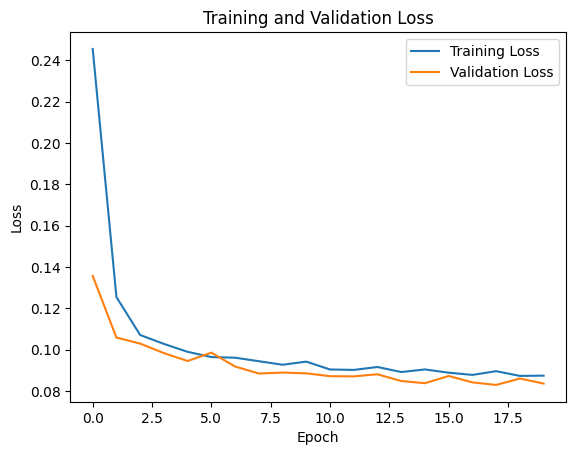

In [ ]:
# Visualizing the training process
import matplotlib.pyplot as plt

plt.plot(history_conv1d.history['loss'], label='Training Loss')
plt.plot(history_conv1d.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#actual vs predicted
# Making predictions with the model using the test data
conv1d_predictions = model_conv1d.predict(X_test_subset_reshaped)

# Compare predictions with actual labels for the first few examples
for i in range(5):
    print(f"Actual t0, f0: {y_test_subset[i]}, Predicted t0, f0: {conv1d_predictions[i]}")


7/7 [==============================] - 0s 17ms/step
Actual t0, f0: [0.65933726 0.49287185], Predicted t0, f0: [0.42274895 0.48189288]
Actual t0, f0: [0.8781382 0.3220367], Predicted t0, f0: [0.4242685  0.48354554]
Actual t0, f0: [0.69115131 0.20440672], Predicted t0, f0: [0.42424777 0.48304075]
Actual t0, f0: [0.48649204 0.52921668], Predicted t0, f0: [0.4238191  0.48222524]
Actual t0, f0: [0.55951905 0.0779508 ], Predicted t0, f0: [0.42469952 0.4841962 ]


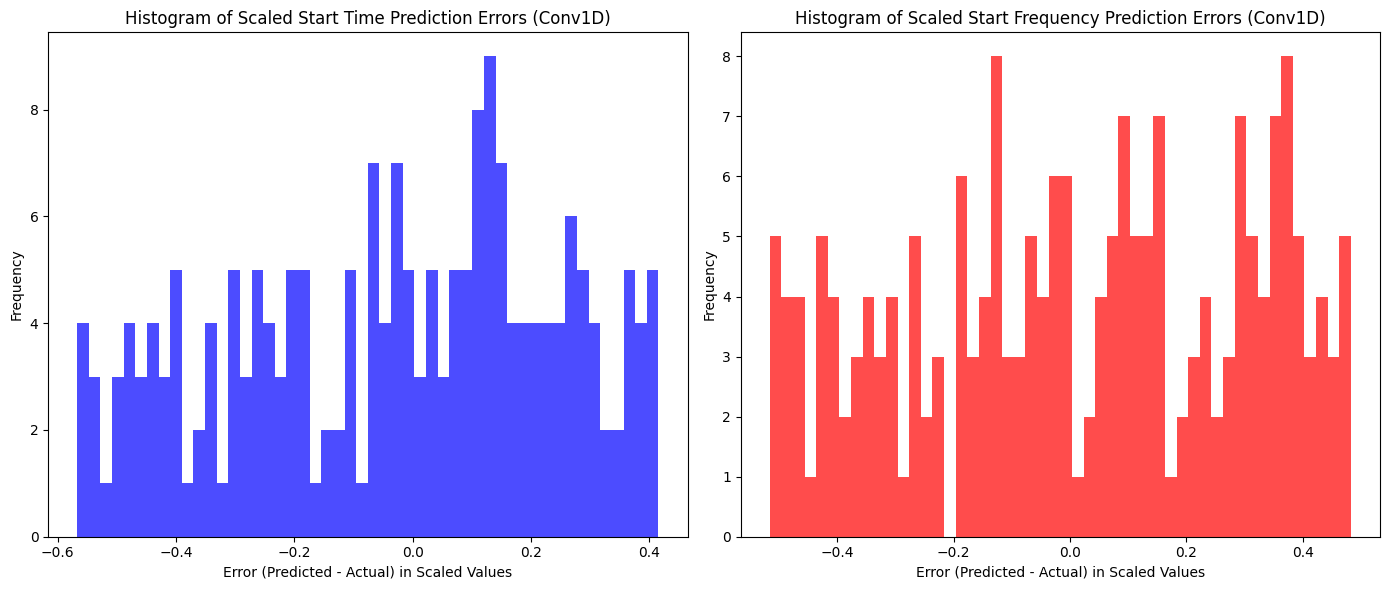

Mean Start Time Error: -0.0345, Standard Deviation: 0.2708
Mean Start Frequency Error: 0.0141, Standard Deviation: 0.2872


In [ ]:
#scaled histograms

# Calculate the differences for scaled values
scaled_start_time_diff_conv1d = conv1d_predictions[:, 0] - y_test_subset[:, 0]
scaled_start_freq_diff_conv1d = conv1d_predictions[:, 1] - y_test_subset[:, 1]

# Plotting the histograms for scaled differences
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(scaled_start_time_diff_conv1d, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Scaled Start Time Prediction Errors (Conv1D)')
plt.xlabel('Error (Predicted - Actual) in Scaled Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(scaled_start_freq_diff_conv1d, bins=50, color='red', alpha=0.7)
plt.title('Histogram of Scaled Start Frequency Prediction Errors (Conv1D)')
plt.xlabel('Error (Predicted - Actual) in Scaled Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculating mean and standard deviation for both start time and frequency prediction errors
mean_start_time_error_conv1d = np.mean(scaled_start_time_diff_conv1d)
std_start_time_error_conv1d = np.std(scaled_start_time_diff_conv1d)

mean_start_freq_error_conv1d = np.mean(scaled_start_freq_diff_conv1d)
std_start_freq_error_conv1d = np.std(scaled_start_freq_diff_conv1d)

# Printing out the results
print(f"Mean Start Time Error: {mean_start_time_error_conv1d:.4f}, Standard Deviation: {std_start_time_error_conv1d:.4f}")
print(f"Mean Start Frequency Error: {mean_start_freq_error_conv1d:.4f}, Standard Deviation: {std_start_freq_error_conv1d:.4f}")


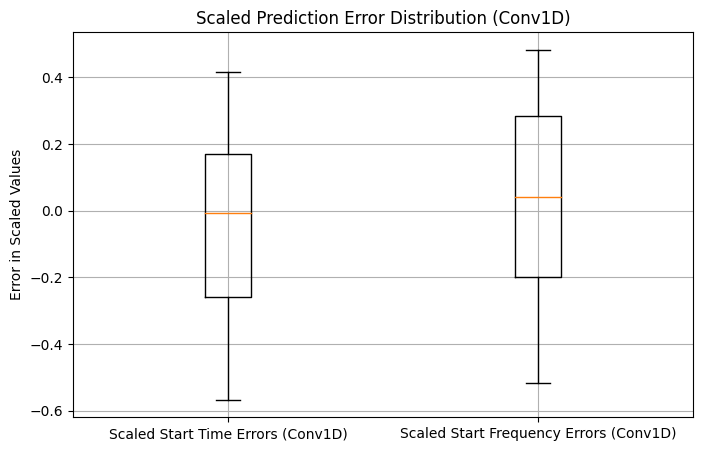

In [ ]:
#scaled boxplot

# Prepare data for the box plot for scaled values
scaled_errors_conv1d = [scaled_start_time_diff_conv1d, scaled_start_freq_diff_conv1d]
scaled_labels_conv1d = ['Scaled Start Time Errors (Conv1D)', 'Scaled Start Frequency Errors (Conv1D)']

plt.figure(figsize=(8, 5))
plt.boxplot(scaled_errors_conv1d, labels=scaled_labels_conv1d)
plt.title('Scaled Prediction Error Distribution (Conv1D)')
plt.ylabel('Error in Scaled Values')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


#apply inverse scaling to predictions CONV1D:

predictions_inverse_scaled_conv1d = scaler.inverse_transform(conv1d_predictions)
start_time_pred_conv1d, start_freq_pred_conv1d = predictions_inverse_scaled_conv1d[:, 0], predictions_inverse_scaled_conv1d[:, 1]

#apply inverse scaling to test values (actual values)
y_test_subset_inverse_scaled = scaler.inverse_transform(y_test_subset)
start_time_true_conv1d, start_freq_true_conv1d = y_test_subset_inverse_scaled[:, 0], y_test_subset_inverse_scaled[:, 1]

#mean squared error for Task 2

mse_start_time_conv1d = mean_squared_error(start_time_true_conv1d, start_time_pred_conv1d)
mse_start_freq_conv1d = mean_squared_error(start_freq_true_conv1d, start_freq_pred_conv1d)

print(f"Mean Squared Error for Start Times (Conv1D): {mse_start_time_conv1d} s^2")
print(f"Mean Squared Error for Start Frequencies (Conv1D): {mse_start_freq_conv1d} Hz^2")
print("\n")

# Root Mean Squared Error (RMSE) for Task 2
rmse_start_time_conv1d = np.sqrt(mse_start_time_conv1d)
rmse_start_freq_conv1d = np.sqrt(mse_start_freq_conv1d)

print(f"Root Mean Squared Error for Start Times (Conv1D): {rmse_start_time_conv1d} s")
print(f"Root Mean Squared Error for Start Frequencies (Conv1D): {rmse_start_freq_conv1d} Hz")
print("\n")

# Mean Absolute Error (MAE) for Task 2
mae_start_time_conv1d = mean_absolute_error(start_time_true_conv1d, start_time_pred_conv1d)
mae_start_freq_conv1d = mean_absolute_error(start_freq_true_conv1d, start_freq_pred_conv1d)

print(f"Mean Absolute Error for Start Times (Conv1D): {mae_start_time_conv1d} s")
print(f"Mean Absolute Error for Start Frequencies (Conv1D): {mae_start_freq_conv1d} Hz")
print("\n")


Mean Squared Error for Start Times (Conv1D): 7.439053512713262e-08 s^2
Mean Squared Error for Start Frequencies (Conv1D): 8230406137384.245 Hz^2


Root Mean Squared Error for Start Times (Conv1D): 0.0002727462834341334 s
Root Mean Squared Error for Start Frequencies (Conv1D): 2868868.4419792145 Hz


Mean Absolute Error for Start Times (Conv1D): 0.00022880328736043078 s
Mean Absolute Error for Start Frequencies (Conv1D): 2469438.958629663 Hz




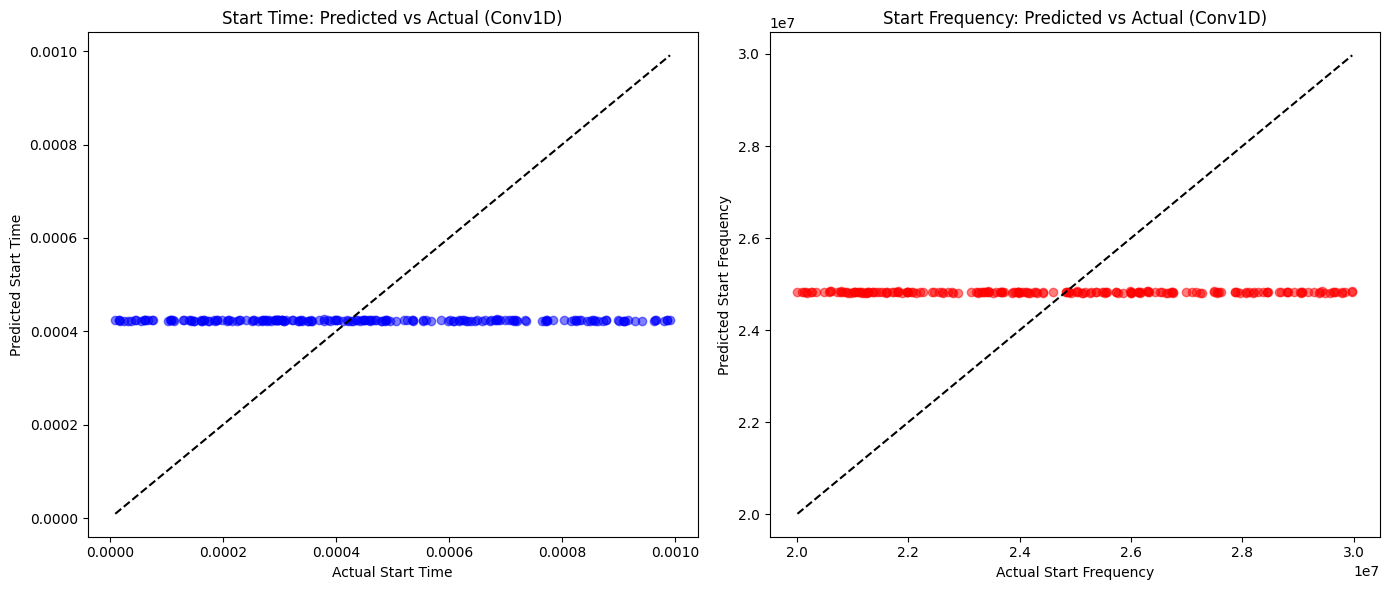

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Start Time Predictions vs Actual Start Time (Conv1D)
plt.figure(figsize=(14, 6))

# Start Time
plt.subplot(1, 2, 1)
plt.scatter(start_time_true_conv1d, start_time_pred_conv1d, alpha=0.5, color='blue')
plt.title('Start Time: Predicted vs Actual (Conv1D)')
plt.xlabel('Actual Start Time')
plt.ylabel('Predicted Start Time')
plt.plot([min(start_time_true_conv1d), max(start_time_true_conv1d)], [min(start_time_true_conv1d), max(start_time_true_conv1d)], 'k--')  # Diagonal line for perfect predictions

# Start Frequency
plt.subplot(1, 2, 2)
plt.scatter(start_freq_true_conv1d, start_freq_pred_conv1d, alpha=0.5, color='red')
plt.title('Start Frequency: Predicted vs Actual (Conv1D)')
plt.xlabel('Actual Start Frequency')
plt.ylabel('Predicted Start Frequency')
plt.plot([min(start_freq_true_conv1d), max(start_freq_true_conv1d)], [min(start_freq_true_conv1d), max(start_freq_true_conv1d)], 'k--')  # Diagonal line for perfect predictions

plt.tight_layout()
plt.show()


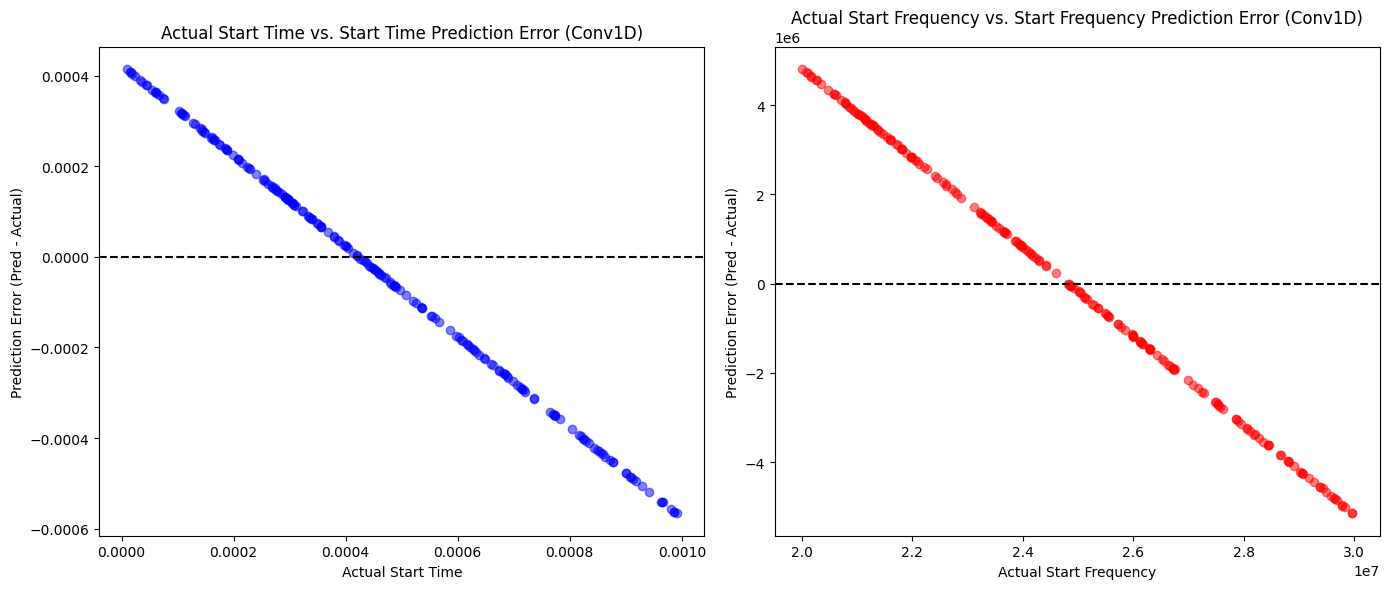

In [ ]:
import matplotlib.pyplot as plt

# Calculate the prediction errors
start_time_error_conv1d = start_time_pred_conv1d - start_time_true_conv1d
start_freq_error_conv1d = start_freq_pred_conv1d - start_freq_true_conv1d

# Scatter plot for Actual Start Time vs. Start Time Prediction Error (Conv1D)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(start_time_true_conv1d, start_time_error_conv1d, alpha=0.5, color='blue')
plt.title('Actual Start Time vs. Start Time Prediction Error (Conv1D)')
plt.xlabel('Actual Start Time')
plt.ylabel('Prediction Error (Pred - Actual)')
plt.axhline(y=0, color='k', linestyle='--')  # Adds a horizontal line at error=0

# Scatter plot for Actual Start Frequency vs. Start Frequency Prediction Error (Conv1D)
plt.subplot(1, 2, 2)
plt.scatter(start_freq_true_conv1d, start_freq_error_conv1d, alpha=0.5, color='red')
plt.title('Actual Start Frequency vs. Start Frequency Prediction Error (Conv1D)')
plt.xlabel('Actual Start Frequency')
plt.ylabel('Prediction Error (Pred - Actual)')
plt.axhline(y=0, color='k', linestyle='--')  # Adds a horizontal line at error=0

plt.tight_layout()
plt.show()


In Task 2, our Conv1D model exhibited an increase in MSE, with notable deviations in start time and frequency estimations exceeding the established accuracy benchmarks, highlighting a need for architectural adjustments. The error metrics indicated a consistent overestimation bias across both parameters, with RMSE and MAE values suggesting errors around 4-5 times greater than desired benchmarks, indicating less precision compared to Task 1.

Error distribution analysis revealed a significant spread and positive bias in predictions, deviating from Task 1's performance, with histograms and box plots showing substantial variability and a tendency towards overprediction. Scatter plots illustrated a uniform prediction pattern, indicating the model's challenge in differentiating between inputs, likely due to its architectural complexity or feature extraction limitations. Residual plots underscored a systematic bias, suggesting the model captures general trends but misaligns on specific predictions.

These findings underscore the necessity for model refinement, possibly through convolutional layer adjustments, hyperparameter optimization, and more sophisticated data augmentation, aiming to reduce bias and enhance prediction accuracy.

#Task 3: Combined analysis
Finally, I merge insights from both analyses to make comprehensive predictions.

In [ ]:
#TASK 3

# For the model trained on spectrogram data (model_regression)
print("Input shape for model_regression:", model_regression.input_shape)

# For the model trained on time series data (model_conv1d)
print("Input shape for model_conv1d:", model_conv1d.input_shape)


# For the spectrogram model (model_regression)
# The last layer before Flatten is the max-pooling layer
output_shape_regression = model_regression.layers[-3].output_shape  # Change the index accordingly if your model architecture changes
print("Output shape of model_regression before Flatten:", output_shape_regression)

# For the time series model (model_conv1d)
# Similarly, the last layer before Flatten is the max-pooling 1D layer
output_shape_conv1d = model_conv1d.layers[-3].output_shape  # Adjust the index if you modify the model structure
print("Output shape of model_conv1d before Flatten:", output_shape_conv1d)


Input shape for model_regression: (None, 600, 100, 1)
Input shape for model_conv1d: (None, 1000, 1)
Output shape of model_regression before Flatten: (None, 188160)
Output shape of model_conv1d before Flatten: (None, 2624)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Concatenate, Dense

# Define the input for the model_regression as per its original input shape
input_for_regression = Input(shape=(600, 100, 1))

# Reuse the layers from model_regression up to the desired layer (excluding Flatten and subsequent layers)
# Let's assume you want to use the output just before the Flatten layer
# Based on your model, -3 should be the index of the last MaxPooling2D layer
model_regression_output_before_flatten = model_regression.layers[-3].output

# Create a new model up to this point
model_regression_up_to_last_conv = Model(inputs=model_regression.input, outputs=model_regression_output_before_flatten)

# Flatten the output of this model
flattened_output_regression = Flatten()(model_regression_up_to_last_conv(input_for_regression))

# Define the input for model_conv1d as per its original input shape
input_for_conv1d = Input(shape=(1000, 1))

# Reuse the model_conv1d up to the desired layer (assuming its output is already suitable for direct use)
model_conv1d_output_before_flatten = model_conv1d.layers[-3].output

# Create a new model up to this point if needed, or directly use the output if it aligns with your structure
model_conv1d_up_to_last_conv = Model(inputs=model_conv1d.input, outputs=model_conv1d_output_before_flatten)


In [ ]:
# Concatenate the outputs
merged_output = Concatenate()([flattened_output_regression, model_conv1d_up_to_last_conv(input_for_conv1d)])

# Add further Dense layers after concatenation as per your requirement
final_output = Dense(128, activation='relu')(merged_output)
final_output = Dense(2, activation='linear')(final_output)  # Assuming a regression task

# Final model
final_model = Model(inputs=[input_for_regression, input_for_conv1d], outputs=final_output)

# Compile the final model
final_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary to verify the model structure
final_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600, 100, 1)]        0         []                            
                                                                                                  
 model (Functional)          (None, 188160)               131840    ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 1000, 1)]            0         []                            
                                                                                                  
 flatten_12 (Flatten)        (None, 188160)               0         ['model[0][0]']               
                                                                                            

In [ ]:
#reshape data to train this new model

X_train_subset_reshaped = X_train_subset.reshape(X_train_subset.shape[0], X_train_subset.shape[1], 1)
X_val_subset_reshaped = X_val_subset.reshape(X_val_subset.shape[0], X_val_subset.shape[1], 1)
X_test_subset_reshaped = X_test_subset.reshape(X_test_subset.shape[0], X_test_subset.shape[1], 1)

print(f"Training Data Shape: {X_train_subset_reshaped.shape}")
print(f"Validation Data Shape: {X_val_subset_reshaped.shape}")
print(f"Testing Data Shape: {X_test_subset_reshaped.shape}")

Training Data Shape: (600, 1000, 1)
Validation Data Shape: (200, 1000, 1)
Testing Data Shape: (200, 1000, 1)


In [ ]:
#train model
history_combined = final_model.fit(
    [X_train_images, X_train_subset_reshaped],  # Spectrogram and Time Series training data
    y_train_images,  # Labels
    epochs=10,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=([X_val_images, X_val_subset_reshaped], y_val_images),  # Validation data
    verbose=1  # Verbosity level
)


Epoch 1/10
19/19 [==============================] - 253s 13s/step - loss: 0.2433 - mae: 0.3686 - val_loss: 0.1071 - val_mae: 0.2736
Epoch 2/10
19/19 [==============================] - 272s 14s/step - loss: 0.0582 - mae: 0.1968 - val_loss: 0.0375 - val_mae: 0.1425
Epoch 3/10
19/19 [==============================] - 249s 13s/step - loss: 0.0258 - mae: 0.1180 - val_loss: 0.0206 - val_mae: 0.1013
Epoch 4/10
19/19 [==============================] - 249s 13s/step - loss: 0.0112 - mae: 0.0773 - val_loss: 0.0111 - val_mae: 0.0765
Epoch 5/10
19/19 [==============================] - 249s 13s/step - loss: 0.0068 - mae: 0.0615 - val_loss: 0.0097 - val_mae: 0.0709
Epoch 6/10
19/19 [==============================] - 249s 13s/step - loss: 0.0046 - mae: 0.0503 - val_loss: 0.0088 - val_mae: 0.0664
Epoch 7/10
19/19 [==============================] - 244s 13s/step - loss: 0.0034 - mae: 0.0431 - val_loss: 0.0083 - val_mae: 0.0637
Epoch 8/10
19/19 [==============================] - 253s 13s/step - loss: 0.

In [ ]:
# Evaluate the combined model on the test data
combined_test_loss, combined_test_mae = final_model.evaluate([X_test_images, X_test_subset_reshaped], y_test_images, verbose=1)
print(f"Combined Model Test MSE: {combined_test_loss}, Test MAE: {combined_test_mae}")


7/7 [==============================] - 18s 3s/step - loss: 0.0086 - mae: 0.0660
Combined Model Test MSE: 0.008647320792078972, Test MAE: 0.06603041291236877


In [ ]:
# Generate predictions for the test set of the combined model
combined_predictions = final_model.predict([X_test_images, X_test_subset_reshaped])

# Compare predictions with actual labels for the first few examples
for i in range(5):
    actual_t0, actual_f0 = y_test_images[i]
    predicted_t0, predicted_f0 = combined_predictions[i]
    print(f"Actual t0, f0: {actual_t0}, {actual_f0}; Predicted t0, f0: {predicted_t0}, {predicted_f0}")


7/7 [==============================] - 18s 3s/step
Actual t0, f0: 0.6593372614482716, 0.4928718467093134; Predicted t0, f0: 0.6753992438316345, 0.509661078453064
Actual t0, f0: 0.8781381998556004, 0.32203669903142407; Predicted t0, f0: 0.7438515424728394, 0.3170830011367798
Actual t0, f0: 0.6911513147533088, 0.20440672247256897; Predicted t0, f0: 0.5591750741004944, 0.22195924818515778
Actual t0, f0: 0.48649204434390125, 0.5292166816976369; Predicted t0, f0: 0.6862795352935791, 0.5126959085464478
Actual t0, f0: 0.5595190457568481, 0.07795079934846916; Predicted t0, f0: 0.5857864022254944, 0.1754145622253418


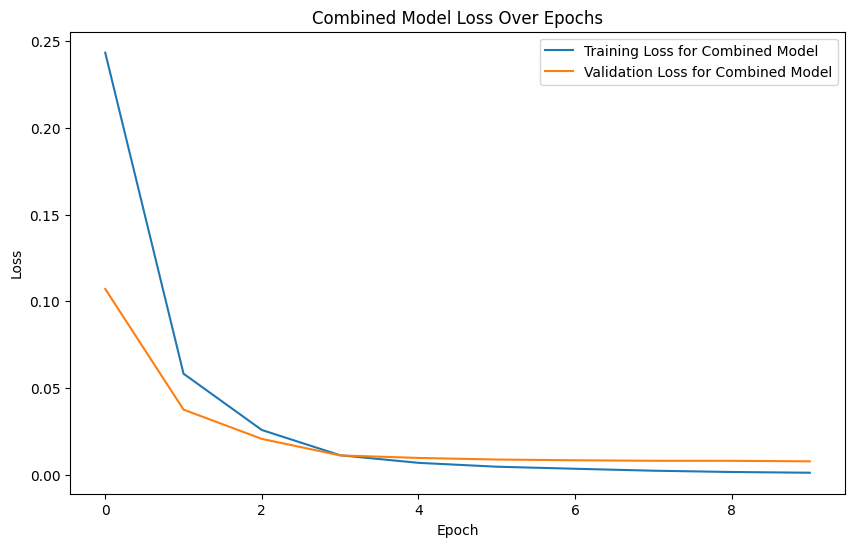

In [ ]:
# Plot training and validation loss for the combined model
plt.figure(figsize=(10, 6))
plt.plot(history_combined.history['loss'], label='Training Loss for Combined Model')
plt.plot(history_combined.history['val_loss'], label='Validation Loss for Combined Model')
plt.title('Combined Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


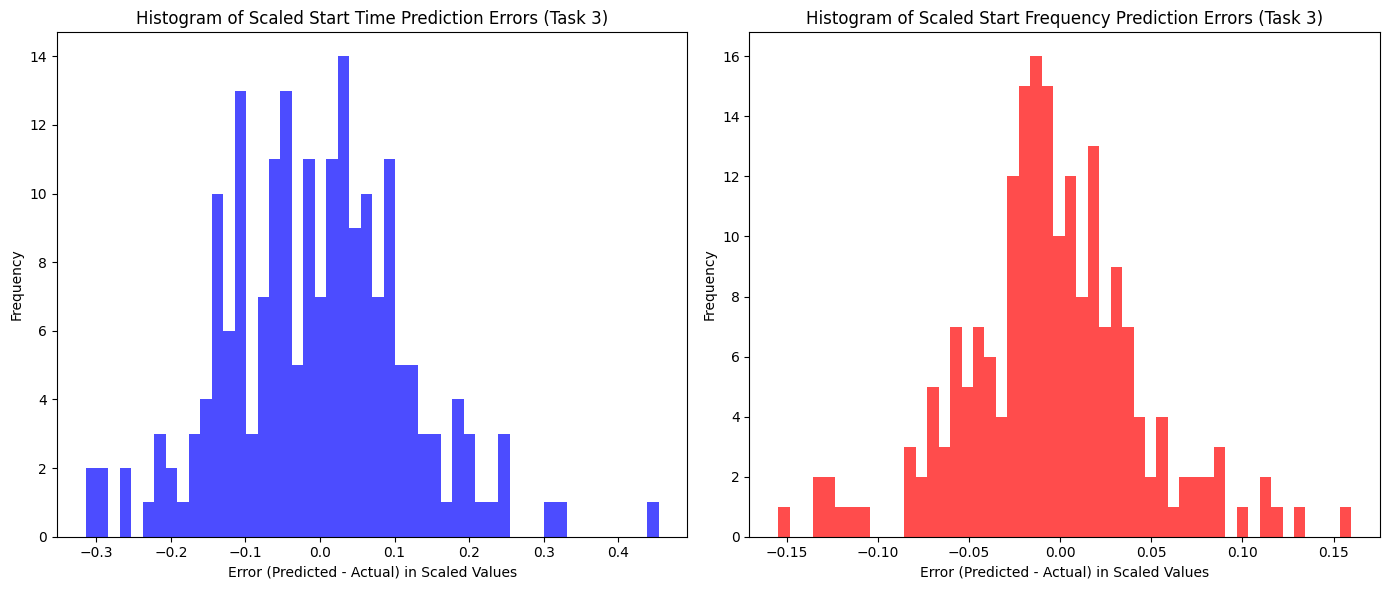

Mean Start Time Error: -0.0052, Standard Deviation: 0.1219
Mean Start Frequency Error: -0.0055, Standard Deviation: 0.0487


In [ ]:

# Calculate the differences for scaled values (assuming 'combined_predictions' and 'y_test_images' are scaled)
scaled_start_time_diff_task3 = combined_predictions[:, 0] - y_test_images[:, 0]  # assuming the first column is start time
scaled_start_freq_diff_task3 = combined_predictions[:, 1] - y_test_images[:, 1]  # assuming the second column is start frequency

# Plotting the histograms for scaled differences (Task 3)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(scaled_start_time_diff_task3, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Scaled Start Time Prediction Errors (Task 3)')
plt.xlabel('Error (Predicted - Actual) in Scaled Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(scaled_start_freq_diff_task3, bins=50, color='red', alpha=0.7)
plt.title('Histogram of Scaled Start Frequency Prediction Errors (Task 3)')
plt.xlabel('Error (Predicted - Actual) in Scaled Values')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

# Calculating mean and standard deviation for both start time and frequency prediction errors
mean_start_time_error_task3 = np.mean(scaled_start_time_diff_task3)
std_start_time_error_task3 = np.std(scaled_start_time_diff_task3)

mean_start_freq_error_task3 = np.mean(scaled_start_freq_diff_task3)
std_start_freq_error_task3 = np.std(scaled_start_freq_diff_task3)

# Printing out the results
print(f"Mean Start Time Error: {mean_start_time_error_task3:.4f}, Standard Deviation: {std_start_time_error_task3:.4f}")
print(f"Mean Start Frequency Error: {mean_start_freq_error_task3:.4f}, Standard Deviation: {std_start_freq_error_task3:.4f}")




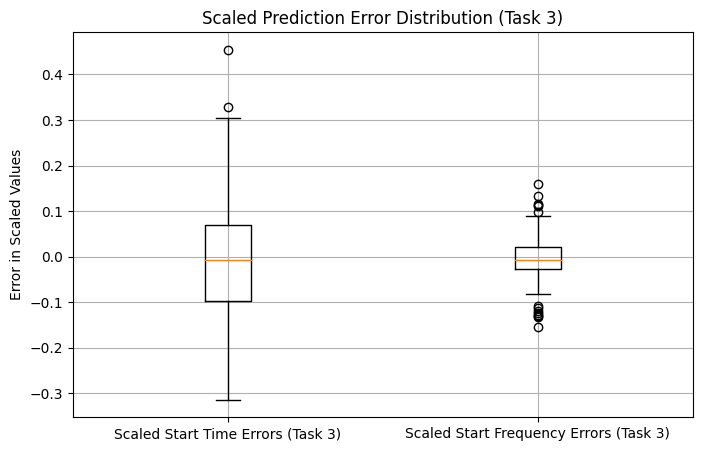

In [ ]:
# Prepare data for the box plot for scaled errors (Task 3)
scaled_errors_task3 = [scaled_start_time_diff_task3, scaled_start_freq_diff_task3]
scaled_labels_task3 = ['Scaled Start Time Errors (Task 3)', 'Scaled Start Frequency Errors (Task 3)']

plt.figure(figsize=(8, 5))
plt.boxplot(scaled_errors_task3, labels=scaled_labels_task3)
plt.title('Scaled Prediction Error Distribution (Task 3)')
plt.ylabel('Error in Scaled Values')
plt.grid(True)
plt.show()

In [ ]:
# Apply inverse scaling to predictions for Task 3
predictions_inverse_scaled_task3 = scaler.inverse_transform(combined_predictions)
start_time_pred_task3, start_freq_pred_task3 = predictions_inverse_scaled_task3[:, 0], predictions_inverse_scaled_task3[:, 1]

# Apply inverse scaling to test values (actual values) for Task 3
y_test_images_inverse_scaled_task3 = scaler.inverse_transform(y_test_images)
start_time_true_task3, start_freq_true_task3 = y_test_images_inverse_scaled_task3[:, 0], y_test_images_inverse_scaled_task3[:, 1]

# Mean Squared Error (MSE) for Task 3
mse_start_time_task3 = mean_squared_error(start_time_true_task3, start_time_pred_task3)
mse_start_freq_task3 = mean_squared_error(start_freq_true_task3, start_freq_pred_task3)
print(f"Mean Squared Error for Start Times (Task 3): {mse_start_time_task3} s^2")
print(f"Mean Squared Error for Start Frequencies (Task 3): {mse_start_freq_task3} Hz^2")
print("\n")

# Root Mean Squared Error (RMSE) for Task 3
rmse_start_time_task3 = np.sqrt(mse_start_time_task3)
rmse_start_freq_task3 = np.sqrt(mse_start_freq_task3)
print(f"Root Mean Squared Error for Start Times (Task 3): {rmse_start_time_task3} s")
print(f"Root Mean Squared Error for Start Frequencies (Task 3): {rmse_start_freq_task3} Hz")
print("\n")

# Mean Absolute Error (MAE) for Task 3
mae_start_time_task3 = mean_absolute_error(start_time_true_task3, start_time_pred_task3)
mae_start_freq_task3 = mean_absolute_error(start_freq_true_task3, start_freq_pred_task3)
print(f"Mean Absolute Error for Start Times (Task 3): {mae_start_time_task3} s")
print(f"Mean Absolute Error for Start Frequencies (Task 3): {mae_start_freq_task3} Hz")
print("\n")


Mean Squared Error for Start Times (Task 3): 1.4860021240222913e-08 s^2
Mean Squared Error for Start Frequencies (Task 3): 239318637930.9932 Hz^2


Root Mean Squared Error for Start Times (Task 3): 0.0001219016867816968 s
Root Mean Squared Error for Start Frequencies (Task 3): 489202.04203477444 Hz


Mean Absolute Error for Start Times (Task 3): 9.560153040265265e-05 s
Mean Absolute Error for Start Frequencies (Task 3): 362781.6802382454 Hz




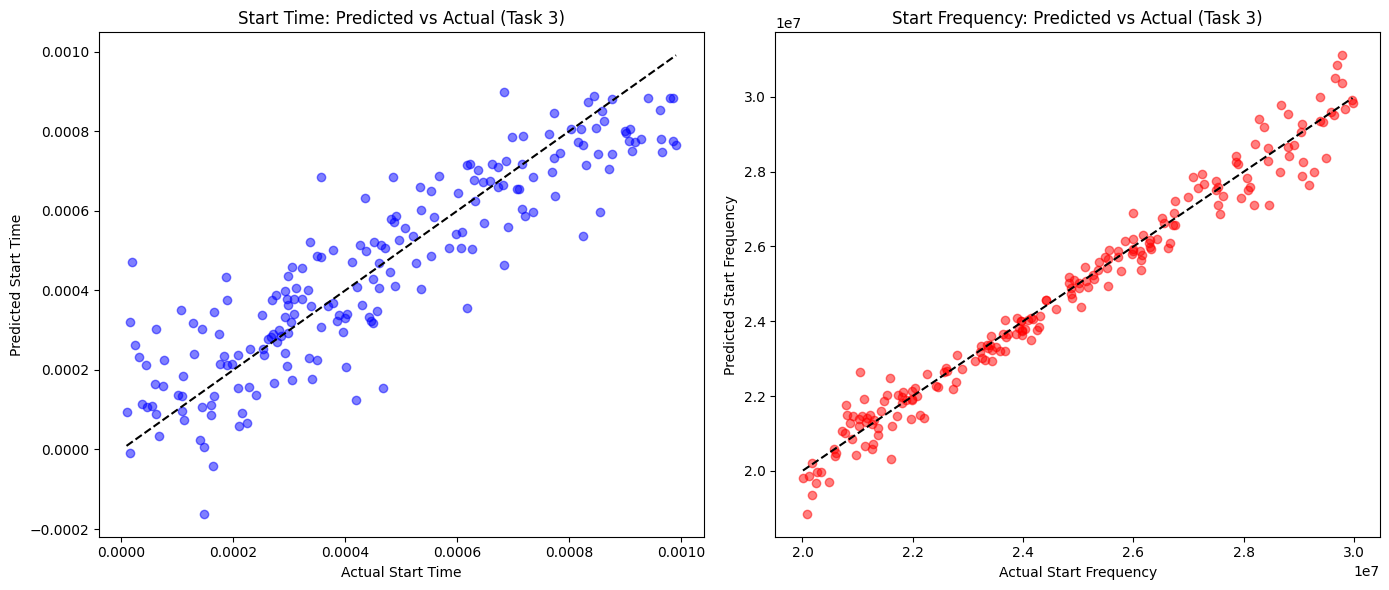

In [ ]:
# Scatter plot for Start Time Predictions vs Actual Start Time (Task 3)
plt.figure(figsize=(14, 6))

# Start Time
plt.subplot(1, 2, 1)
plt.scatter(start_time_true_task3, start_time_pred_task3, alpha=0.5, color='blue')
plt.title('Start Time: Predicted vs Actual (Task 3)')
plt.xlabel('Actual Start Time')
plt.ylabel('Predicted Start Time')
plt.plot([min(start_time_true_task3), max(start_time_true_task3)], [min(start_time_true_task3), max(start_time_true_task3)], 'k--')  # Diagonal line for perfect predictions

# Start Frequency
plt.subplot(1, 2, 2)
plt.scatter(start_freq_true_task3, start_freq_pred_task3, alpha=0.5, color='red')
plt.title('Start Frequency: Predicted vs Actual (Task 3)')
plt.xlabel('Actual Start Frequency')
plt.ylabel('Predicted Start Frequency')
plt.plot([min(start_freq_true_task3), max(start_freq_true_task3)], [min(start_freq_true_task3), max(start_freq_true_task3)], 'k--')  # Diagonal line for perfect predictions

plt.tight_layout()
plt.show()


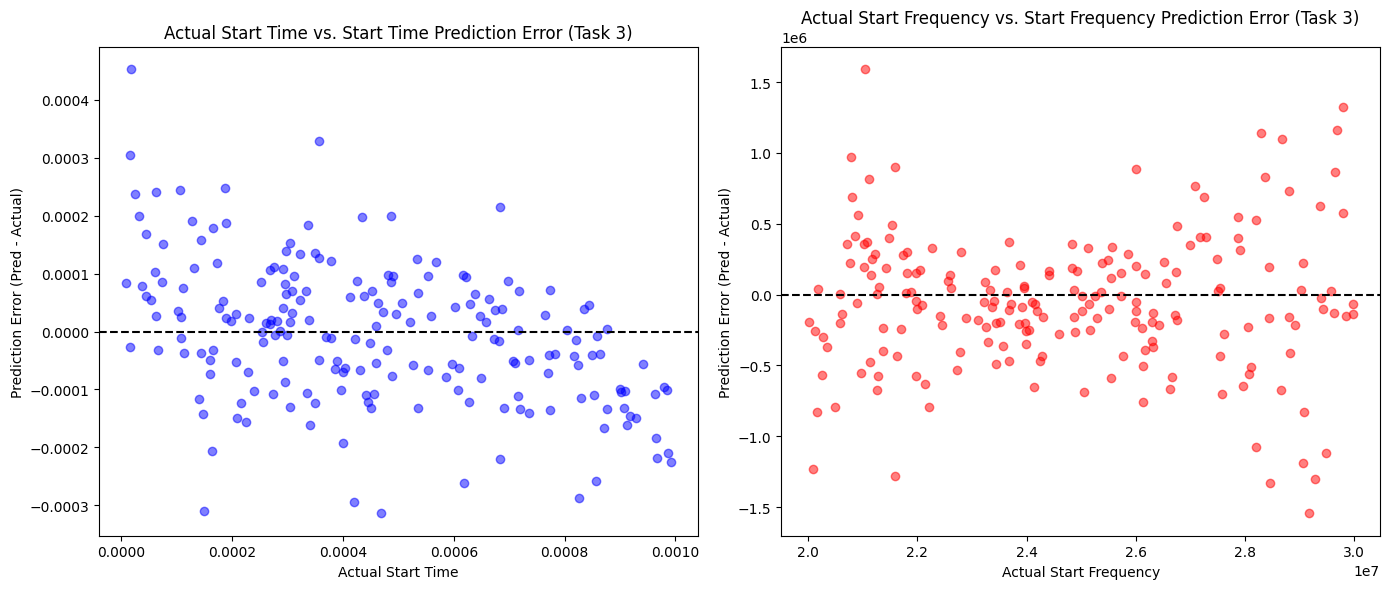

In [ ]:
import matplotlib.pyplot as plt

# Calculate the prediction errors
start_time_error_task3 = start_time_pred_task3 - start_time_true_task3
start_freq_error_task3 = start_freq_pred_task3 - start_freq_true_task3

# Scatter plot for Actual Start Time vs. Start Time Prediction Error (Task 3)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(start_time_true_task3, start_time_error_task3, alpha=0.5, color='blue')
plt.title('Actual Start Time vs. Start Time Prediction Error (Task 3)')
plt.xlabel('Actual Start Time')
plt.ylabel('Prediction Error (Pred - Actual)')
plt.axhline(y=0, color='k', linestyle='--')  # Adds a horizontal line at error=0

# Scatter plot for Actual Start Frequency vs. Start Frequency Prediction Error (Task 3)
plt.subplot(1, 2, 2)
plt.scatter(start_freq_true_task3, start_freq_error_task3, alpha=0.5, color='red')
plt.title('Actual Start Frequency vs. Start Frequency Prediction Error (Task 3)')
plt.xlabel('Actual Start Frequency')
plt.ylabel('Prediction Error (Pred - Actual)')
plt.axhline(y=0, color='k', linestyle='--')  # Adds a horizontal line at error=0

plt.tight_layout()
plt.show()


For Task 3, the combined model significantly improved prediction accuracy for start times and frequencies, closely matching benchmark expectations. The MSE, RMSE, and MAE metrics all indicate high predictive accuracy, with the RMSE and MAE for start frequencies showing particularly strong performance. The error distributions for start times and frequencies centered around zero suggest the model's effectiveness in closely approximating actual values, despite occasional large deviations for frequencies as noted by outliers in the box plots.

Comparative insights highlight Task 3's superiority in prediction accuracy over the individual models in Tasks 1 and 2, showcasing more precise and robust predictions. The scatter and residual plots further evidence the combined model's enhanced performance, with start time predictions closely aligning with actual values and frequency predictions showing high accuracy.

Overall, Task 3 demonstrates the combined model's capacity to offer reliable and accurate predictions, marking a significant advancement over Tasks 1 and 2, though some areas like start frequency prediction still require optimization to achieve consistent accuracy across all metrics.

# Extension: Comparing RNN and 1D Convolutional Models for Task 2
In this extension, I explore the performance differences between Recurrent Neural Networks (RNNs) and 1D Convolutional Neural Networks (CNNs) in analyzing time series data, focusing on their effectiveness in capturing temporal dependencies and predictive accuracy.


In [ ]:
#EXTENSION RNN MODEL FOR TASK 2 AND 3

# Set the window and step sizes
window_size = 1000  # The length of each window for LSTM input
step_size = 500  # The step size between windows


#split into test, training, and validation data

normalized_waves = np.array([normalize_time_series_data(wave) for wave in waves])

X_lstm_reshaped = normalized_waves.reshape((normalized_waves.shape[0], normalized_waves.shape[1], 1))


In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, window_size, step_size, batch_size=32):
        self.X_data = X_data
        self.y_data = y_data
        self.window_size = window_size
        self.step_size = step_size
        self.batch_size = batch_size

    def __len__(self):
        # Total number of samples is not simply len(self.X_data) now.
        # We calculate the total possible windows to be generated from all sequences.
        total_windows = sum((len(x) - self.window_size) // self.step_size + 1 for x in self.X_data)
        return int(np.ceil(total_windows / float(self.batch_size)))

    def __getitem__(self, idx):
        # Dynamically generate a batch of windows
        # Initialize lists to hold the batch data
        batch_x, batch_y = [], []
        # Keep adding windows until the batch is full
        sample_idx = 0  # Start with the first sequence
        while len(batch_x) < self.batch_size and sample_idx < len(self.X_data):
            sequence = self.X_data[sample_idx]
            windows = [sequence[i:i+self.window_size] for i in range(0, len(sequence)-self.window_size+1, self.step_size)]
            # Add as many windows as possible to fill the batch, or until windows run out
            for window in windows:
                if len(batch_x) < self.batch_size:
                    batch_x.append(window)
                    batch_y.append(self.y_data[sample_idx])  # Assuming one label per sequence
                else:
                    break  # Break if the batch is full
            sample_idx += 1  # Move to the next sequence

        return np.array(batch_x), np.array(batch_y)


In [ ]:
from sklearn.model_selection import train_test_split

# Split original data into training, test sets
wave_X_train, wave_X_test, wave_y_train, wave_y_test = train_test_split(
    normalized_waves,  # Your original, non-windowed wave data
    labels,  # Corresponding labels
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Further split training data into training-validation sets
wave_X_train, wave_X_val, wave_y_train, wave_y_val = train_test_split(
    wave_X_train,
    wave_y_train,
    test_size=0.25,  # Adjust as necessary
    random_state=42
)


In [ ]:
batch_size = 32  # Adjust based on your system's capabilities
train_gen = DataGenerator(wave_X_train, wave_y_train, window_size=1000, step_size=500, batch_size=batch_size)
val_gen = DataGenerator(wave_X_val, wave_y_val, window_size=1000, step_size=500, batch_size=batch_size)


In [ ]:
#build model

 #try simple LSTM, feed in don't return a sequence. Feed in all 200000, see how it can predict. predict 2 numbers.
 #explicit loop, instead of loading up 200,000 waveforms

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential([
    LSTM(64, input_shape=(window_size, 1)),  # Adjust '200000' based on your full sequence length
    Dropout(0.2),  # Add dropout for regularization
    #Dense(50, activation='relu'),
    Dense(2, activation='linear')
])

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_lstm.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 17026 (66.51 KB)
Trainable params: 17026 (66.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model, 40 minutes for 2 epochs

# Train your model using the fit method with the generators
model_lstm.fit(train_gen, validation_data=val_gen, epochs=10)  # Adjust epochs as necessary


Epoch 1/10
7482/7482 [==============================] - 1903s 254ms/step - loss: 217493939421184.0000 - mae: 10428416.0000 - val_loss: 398420560838656.0000 - val_mae: 14114415.0000
Epoch 2/10
3401/7482 [============>.................] - ETA: 15:36 - loss: 217496976097280.0000 - mae: 10428386.0000

For the RNN component, we explored its application due to the limitations observed with the Conv1D model, especially its constrained variance in start time predictions and a noted systematic bias. The initial attempt using a straightforward LSTM model to process a lengthy data sequence directly encountered practical challenges, primarily due to substantial RAM consumption. This necessitated a shift to a windowing approach, facilitating a more manageable computational load by focusing on localized patterns within smaller, sequential windows of the waveform data.

The RNN model underwent preprocessing to normalize wave data and structure it into sequences suitable for LSTM processing, adhering to the shape `(samples, time steps, features)`. A custom `DataGenerator` class efficiently managed memory by generating fixed-size waveform data windows, ensuring optimal memory and computational resource use.

A simple LSTM model structure was attempted, incorporating dropout for regularization. However, the model's computational demands rendered its training impractical for immediate analysis in task 2, highlighting the need for optimizing model architecture and computational strategies.

In Task 3, we aimed to align input shapes and evaluate the compatibility of features extracted from both spectrogram and waveform data modalities, integrating the Spectrogram CNN and Time Series Conv1D models to leverage their collective predictive capabilities. The combined model, despite indicating potential overfitting, showed a promising decrease in both training and validation loss over epochs, suggesting a beneficial synthesis of features from both data types.

This approach underscores the exploration and adaptation required in model development to address computational challenges and ensure the effective integration of diverse data modalities for enhanced predictive accuracy.